In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sys

# Check if running in an interactive environment and set the file path accordingly
if '__file__' in globals():
    script_dir = os.path.dirname(__file__)
else:
    script_dir = os.getcwd()

# Add the path with llm_agents to the sys path
sys.path.append(os.path.join(script_dir, 'llm_agents'))

from process_score_calculator import prepare_calculations as calculate_scores
from performance_analyzer import perform_analysis as analyze_performance
from openai_image_analyzer import analyze_image
from openai_agents_analysts import main as analyze_agents

import warnings
warnings.filterwarnings("ignore")

In [2]:

scores_data = calculate_scores(DataName="BPIC_2019", layer="General_Process_Standards", index='case_id', view='Process_Cost')
data = scores_data.data
data.head(2)

eventID  cat_dim_5       cat_dim_4          cat_dim_3  \
0  536870912000  Marketing  companyID_0000  EC Purchase order   
1  536870912001  Marketing  companyID_0000  EC Purchase order   

           cat_dim_2  case_Purchasing_Document case_Purch._Doc._Category_name  \
0  Digital Marketing                2000000100                 Purchase order   
1  Digital Marketing                2000000100                 Purchase order   

       cat_dim_8 cat_dim_6                      cat_dim_7  ... @@case_index  \
0  vendorID_0053   Service  3-way match, invoice after GR  ...            0   
1  vendorID_0053   Service  3-way match, invoice after GR  ...            0   

  case:concept:name            concept:name            time:timestamp  \
0  2000000100_00001  Vendor creates invoice 2017-01-31 23:59:00+00:00   
1  2000000100_00001  Vendor creates invoice 2017-05-25 23:59:00+00:00   

   score_found_case_id score_sequential_case_id  score_equilibrium_case_id  \
0                  0.0                 0.000921                        0.0   
1                  0.0                 0.000921                        0.0   

  score_singular_case_id score_exclusion_case_id mean_score  
0                    0.0                     0.0   0.000184  
1                    0.0                     0.0   0.000184  

[2 rows x 33 columns]

In [3]:
data_inv_gr = data[data['cat_dim_7'] == '3-way match, invoice before GR']

<Figure size 1400x1200 with 0 Axes>

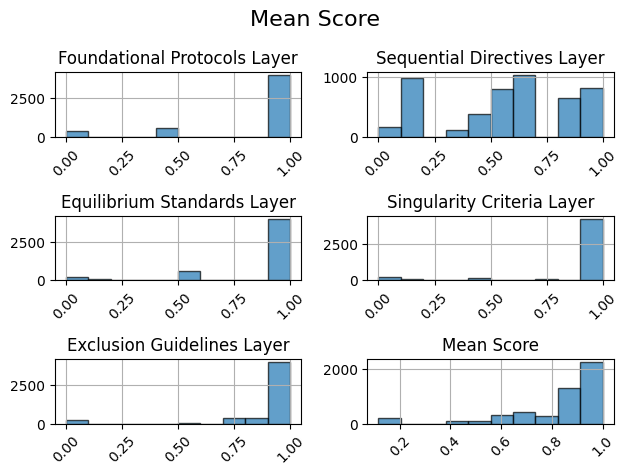

In [4]:
def plot_histogram(data, title, bins=10):

    # List of score columns to be normalized
    score_columns = [
        'score_found_case_id', 
        'score_sequential_case_id', 
        'score_equilibrium_case_id', 
        'score_singular_case_id', 
        'score_exclusion_case_id'
    ]

    # Apply min-max normalization to each score column
    for col in score_columns:
        min_val = data[col].min()
        max_val = data[col].max()
        data[col] = (data[col] - min_val) / (max_val - min_val)

    # Recalculate the mean_score based on normalized values
    data['mean_score'] = data[score_columns].mean(axis=1)


    # Define the titles for each histogram
    titles = [
        'Foundational Protocols Layer',
        'Sequential Directives Layer',
        'Equilibrium Standards Layer',
        'Singularity Criteria Layer',
        'Exclusion Guidelines Layer',
        'Mean Score'
    ]

    # Adjust figure size for better readability
    plt.figure(figsize=(14, 12))

    # Plot histograms with more bins and transparency for better visibility
    axes = data[['score_found_case_id', 'score_sequential_case_id', 'score_equilibrium_case_id', 'score_singular_case_id', 'score_exclusion_case_id', 'mean_score']].hist(
        bins=bins,  # Increase the number of bins
        alpha=0.7,  # Set transparency to avoid overlap
        layout=(3, 2),  # Arrange plots in a 3x2 grid
        edgecolor='black'  # Add edge color for better definition
    )

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Set titles for each histogram
    for ax, title in zip(axes, titles):
        ax.set_title(title, fontsize=12)  # Set individual title

    # Rotate x-axis labels for better readability
    for ax in axes:
        for label in ax.get_xticklabels():
            label.set_rotation(45)  # Rotate x-axis labels
            label.set_fontsize(10)  # Set x-axis labels font size

    #add title
    plt.suptitle(title, fontsize=16)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()

plot_histogram(data_inv_gr, 'Histogram of Scores for 3-way match, invoice before GR', bins=10)

## Analyze individual performance

Analyze performance for selected categories and filtered data

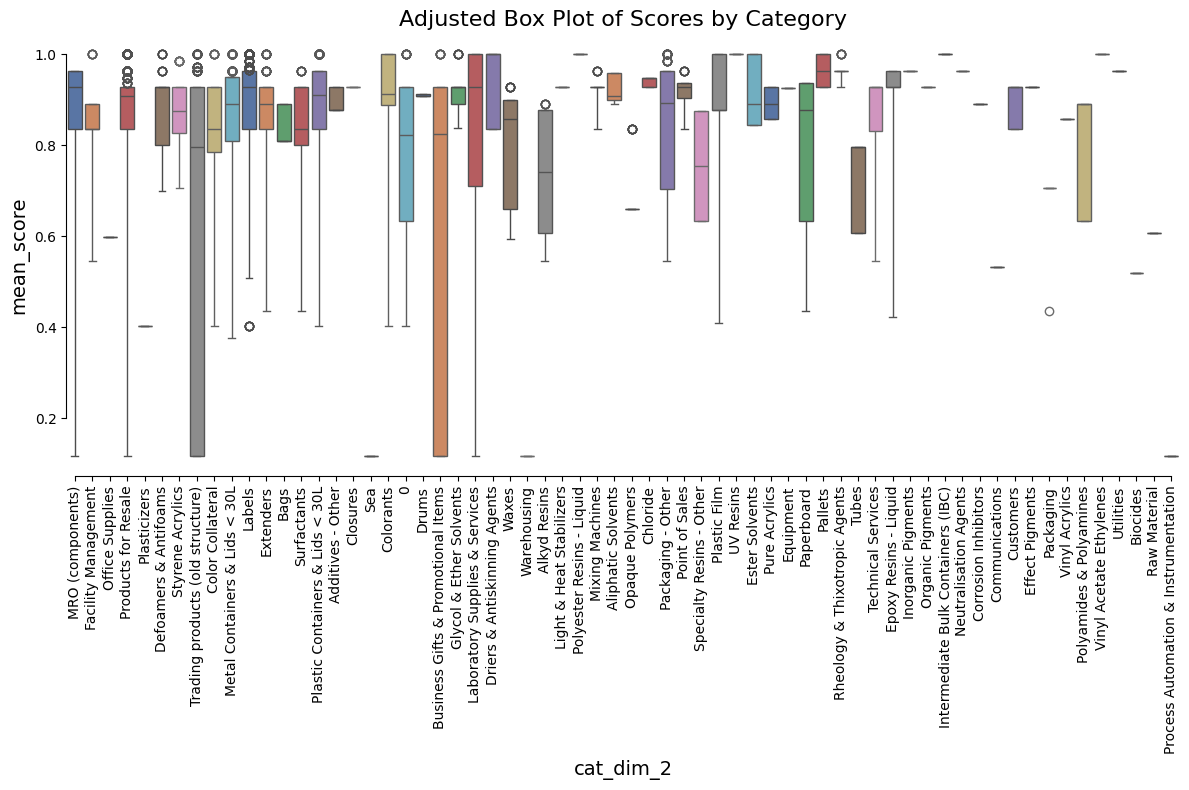

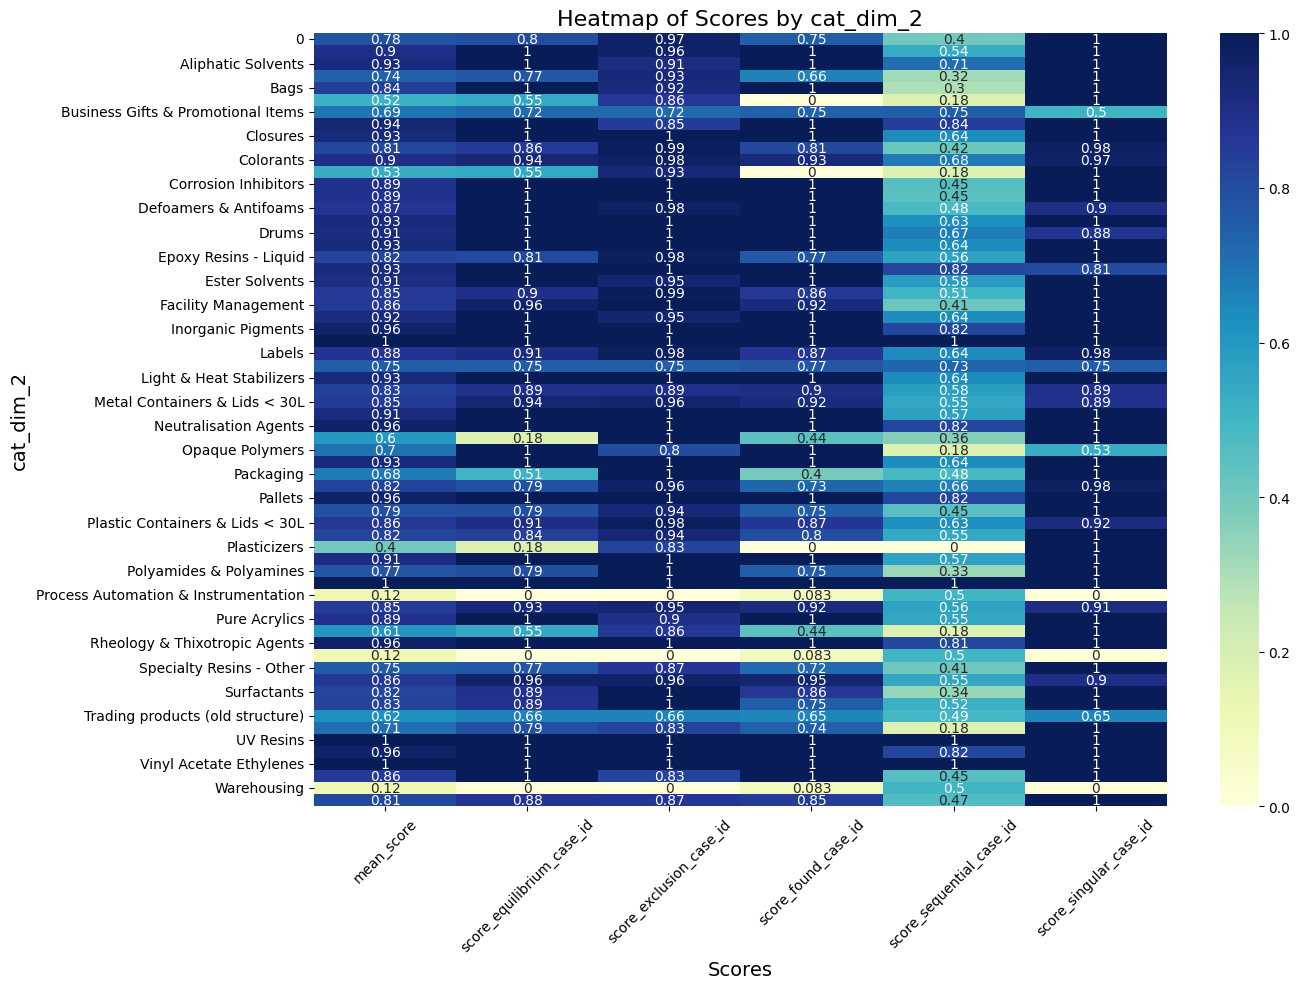

In [5]:
analyze_performance(visualize=True, category='cat_dim_2', score='mean_score', data_filtered=data_inv_gr)

## Create LLM Report for each category

In [7]:
api_key = "YOUR_API_KEY"
summary = analyze_agents(summary_needed=True, categories=['cat_dim_2',  'cat_dim_5', 'cat_dim_6', 'cat_dim_8', 'cat_dim_9'],api_key=api_key)

In [11]:
summary

'### Actionable Improvement Plan\n\n#### 1. Detailed Investigation\n- **Focus**: \n  - **Low Performing Categories**: Additives, CO2, Adhesives\n  - **Medium Performing Categories**: MRQ (Components), Chemicals (Multiple types), Laboratory Supplies, Alkyd Resins, Light & Heat Stabilizers, Solvents (Various types)\n- **Actions**:\n  - Conduct root cause analysis sessions.\n  - Trace process steps to identify inefficiencies.\n  - Utilize workshops to gather insights from process owners.\n\n#### 2. Optimization Plan\n- **Methods**: \n  - Implement Lean and Six Sigma methodologies.\n  - Create a targeted improvement plan.\n- **Goals**: \n  - Increase mean scores for Additives, CO2, Adhesives to > 0.6.\n  - Optimize MRQ, Chemicals, Laboratory Supplies, Alkyd Resins, Stabilizers, Solvents to mean scores > 0.8.\n\n#### 3. Training and Development\n- **Focus**: \n  - Teams involved in low and medium-performing processes.\n- **Actions**:\n  - Conduct training sessions on best practices.\n  - Em

## Get detailed analysis for each category


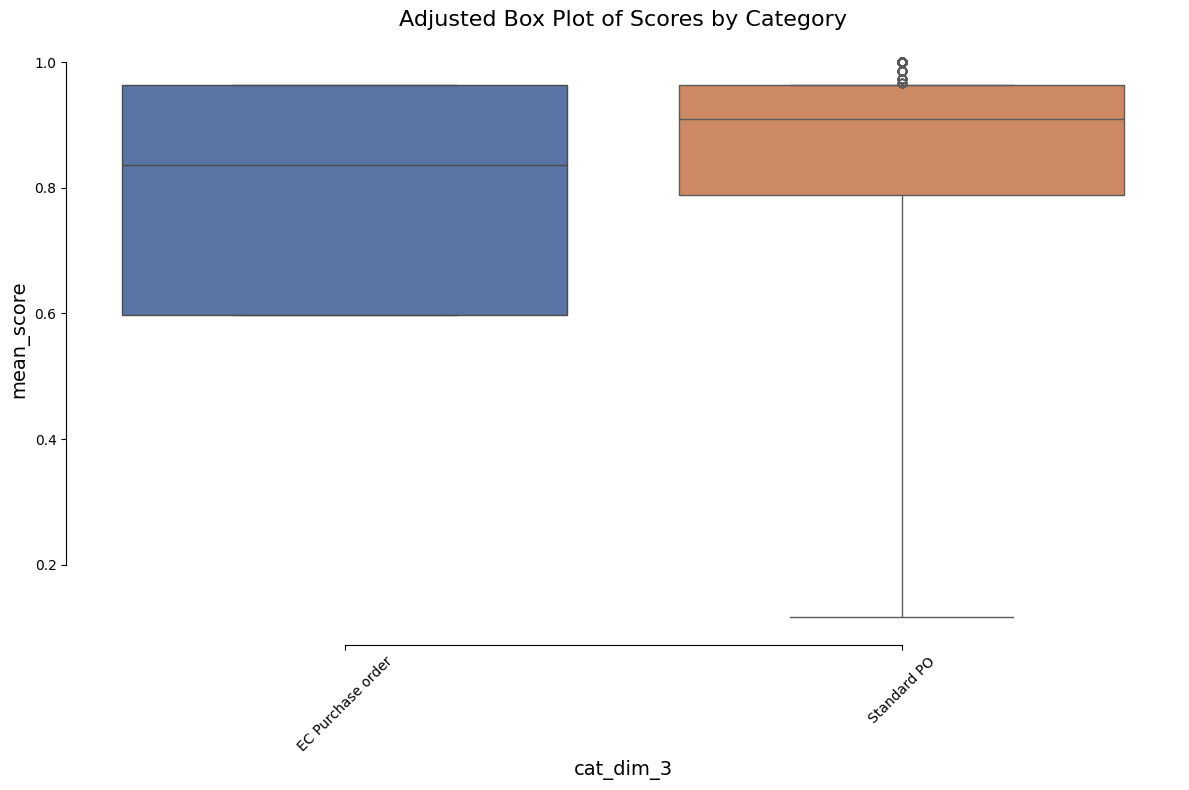

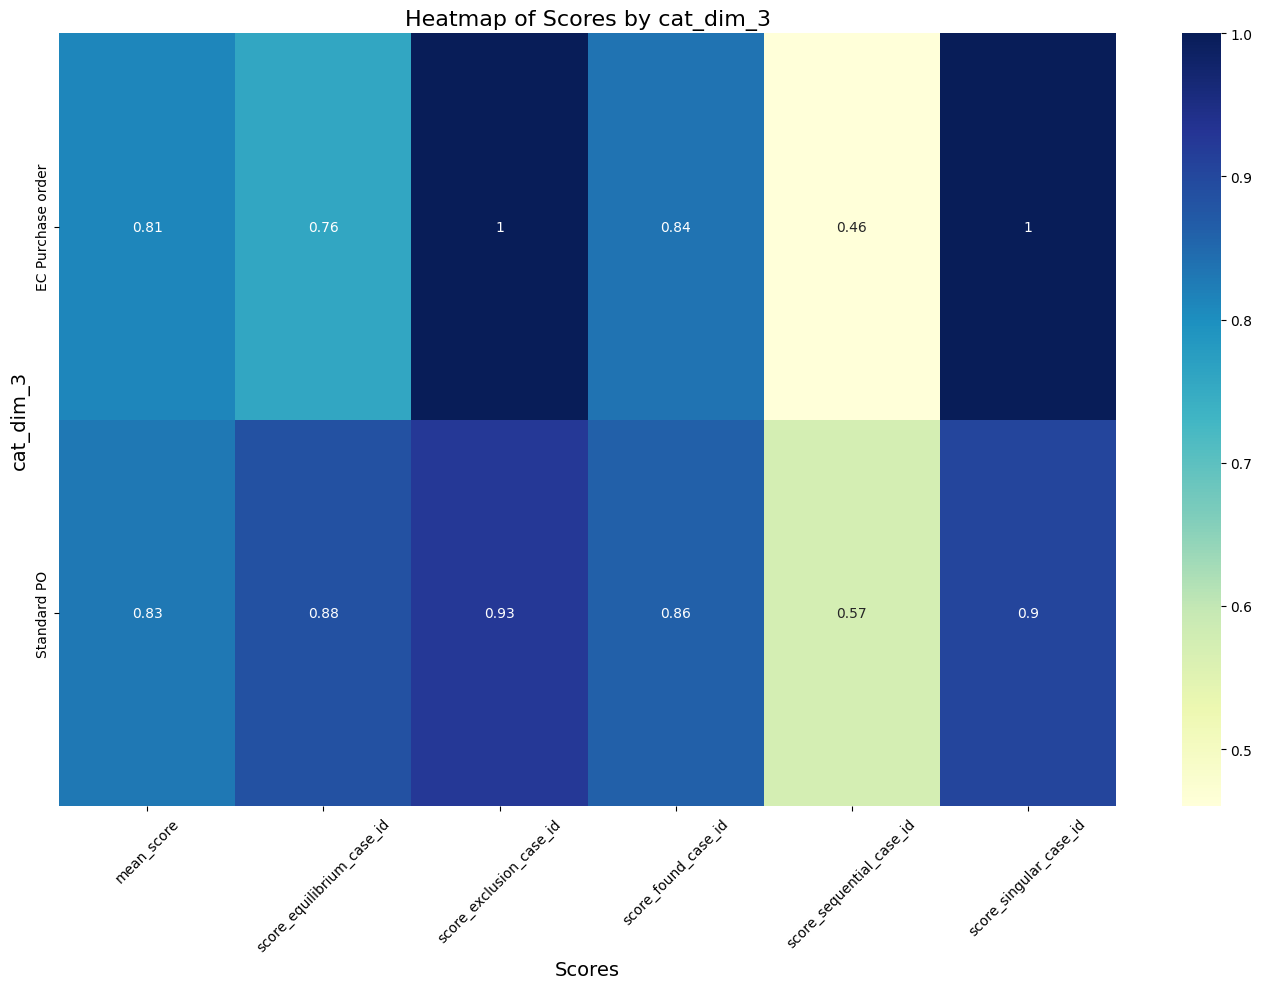

In [6]:
analyze_performance(visualize=True, category='cat_dim_3', score='mean_score', data_filtered=data_inv_gr)

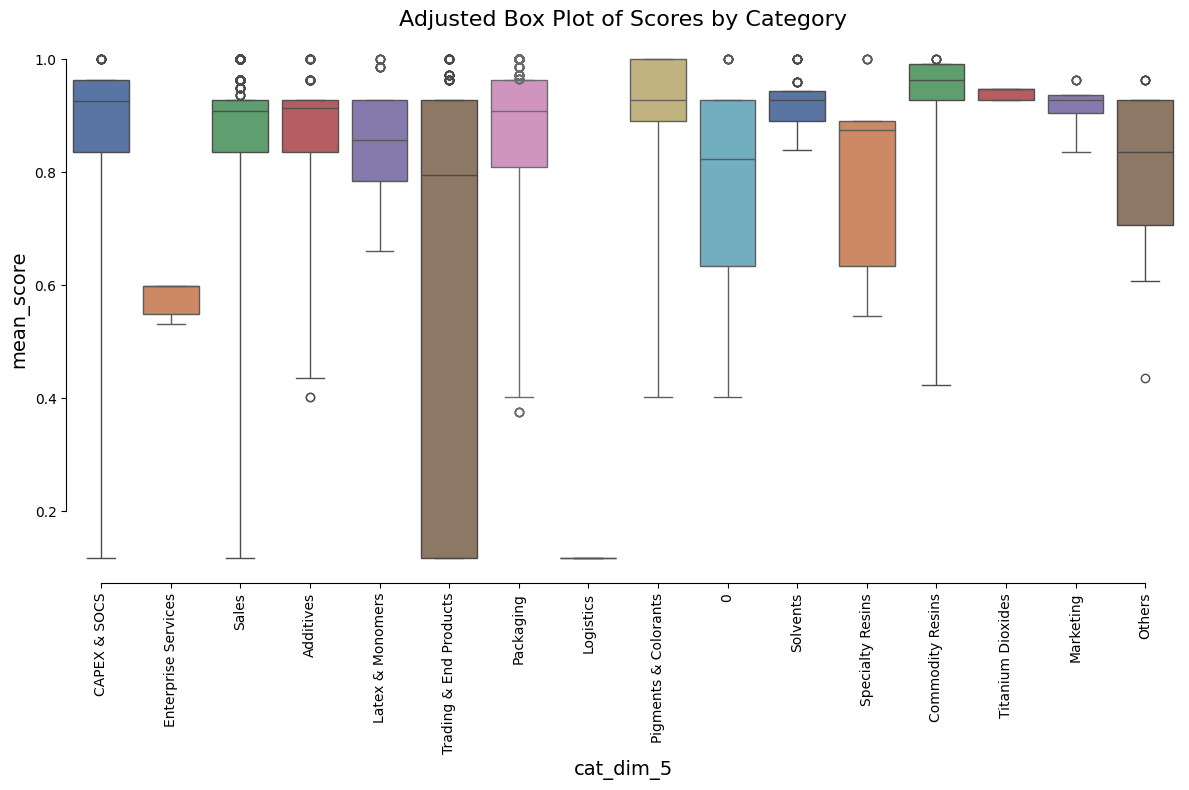

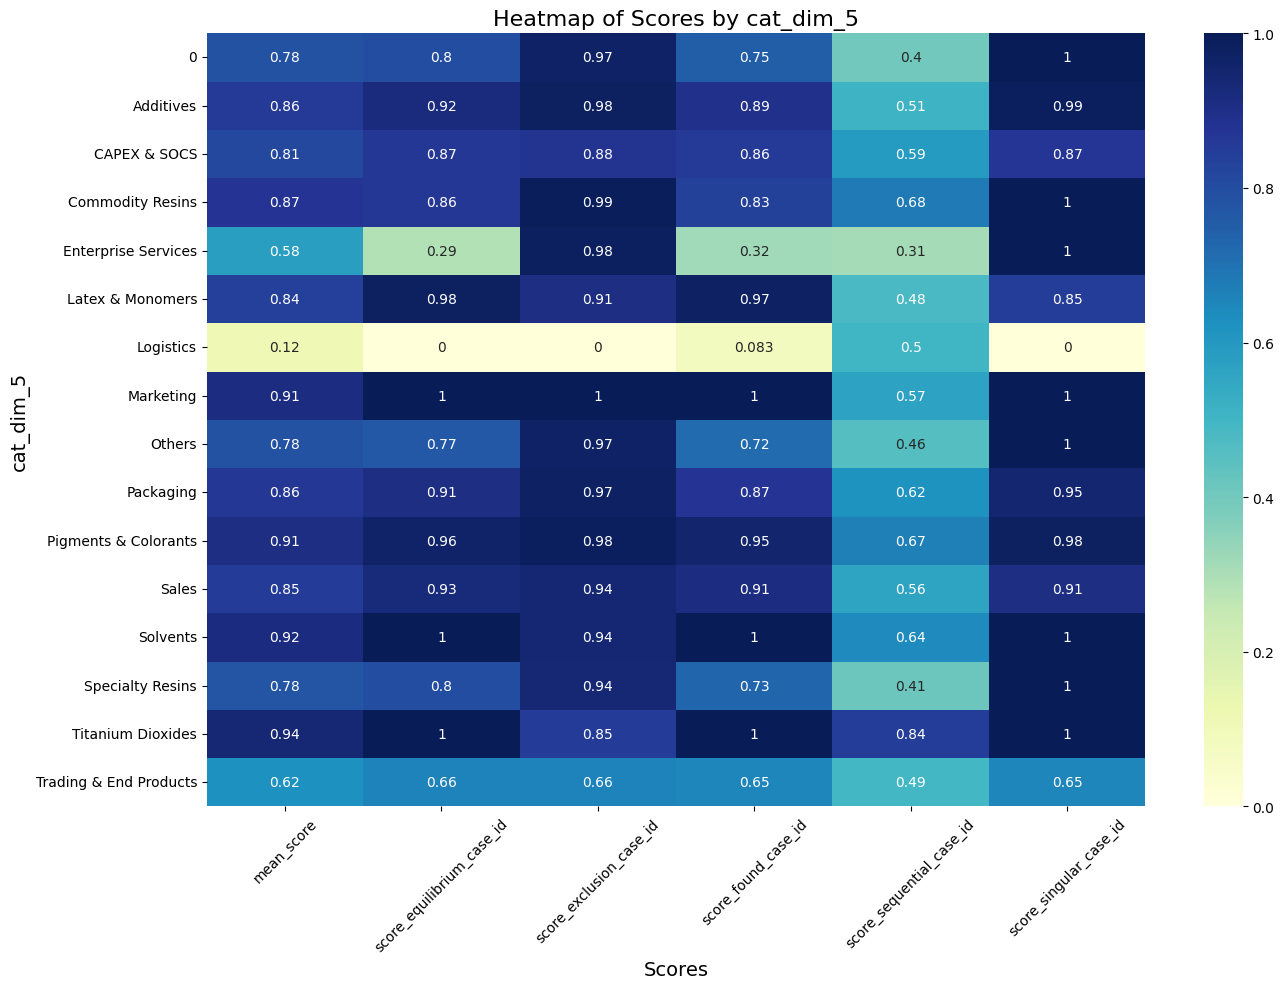

In [8]:
analyze_performance(visualize=True, category='cat_dim_5', score='mean_score', data_filtered=data_inv_gr)

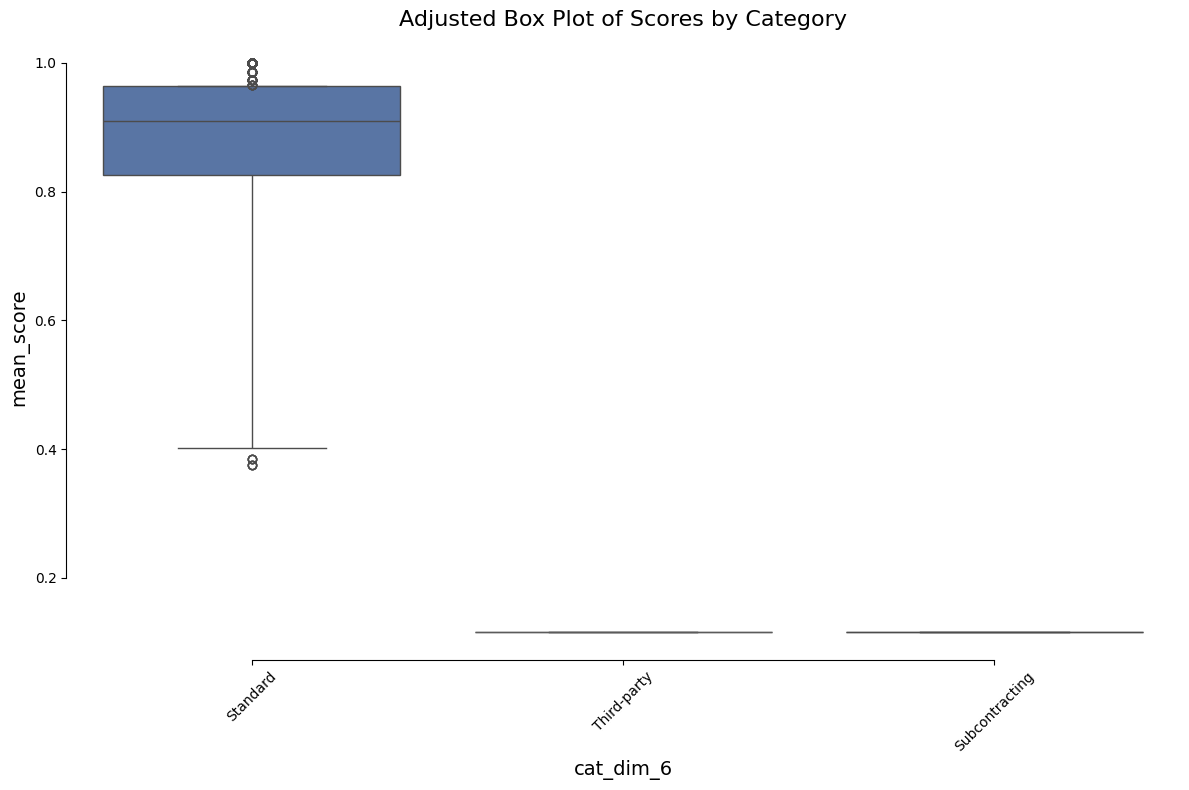

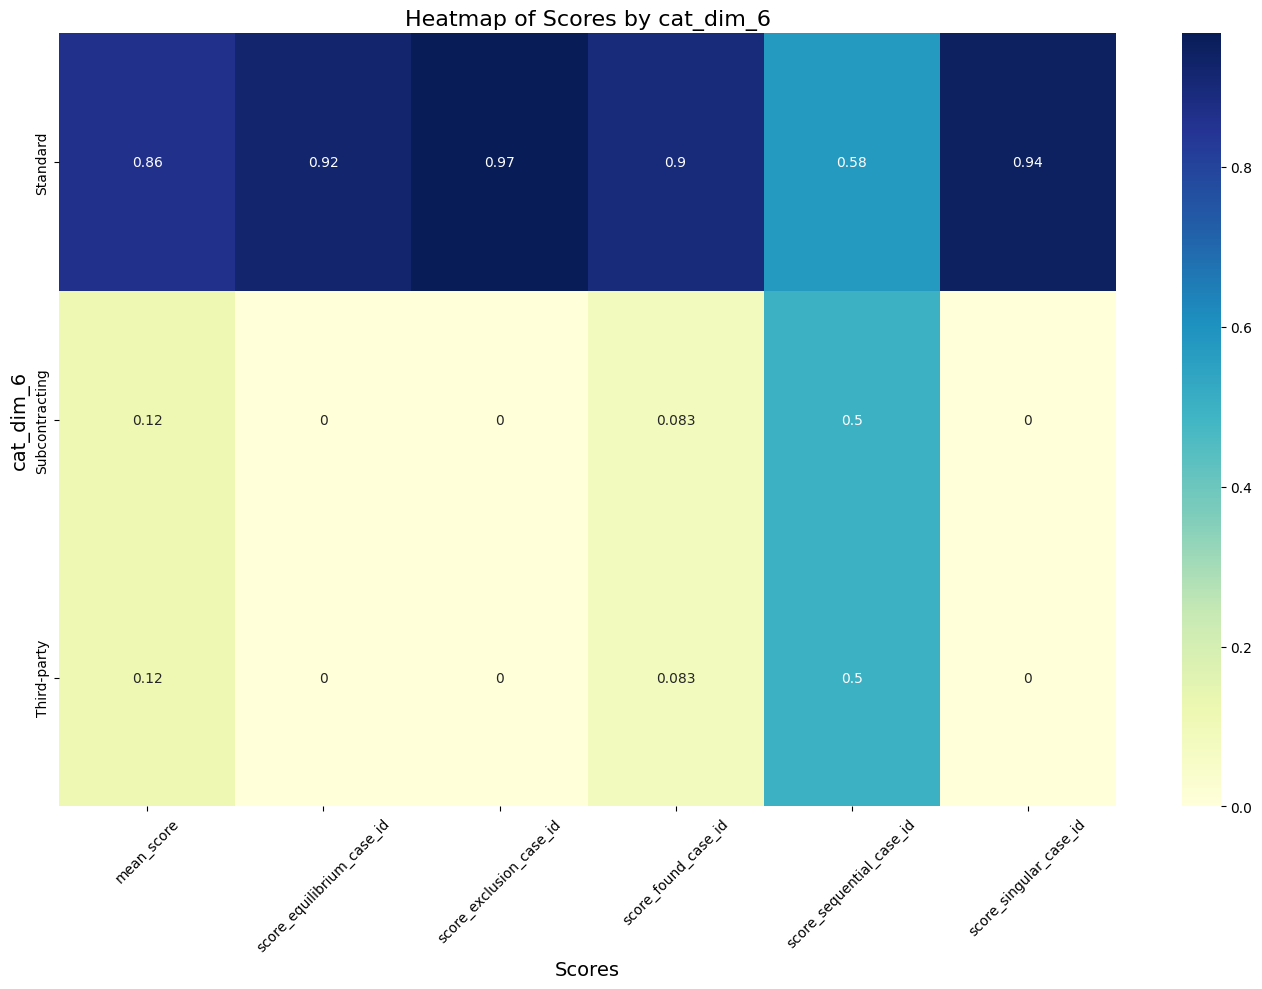

In [9]:
analyze_performance(visualize=True, category='cat_dim_6', score='mean_score', data_filtered=data_inv_gr)

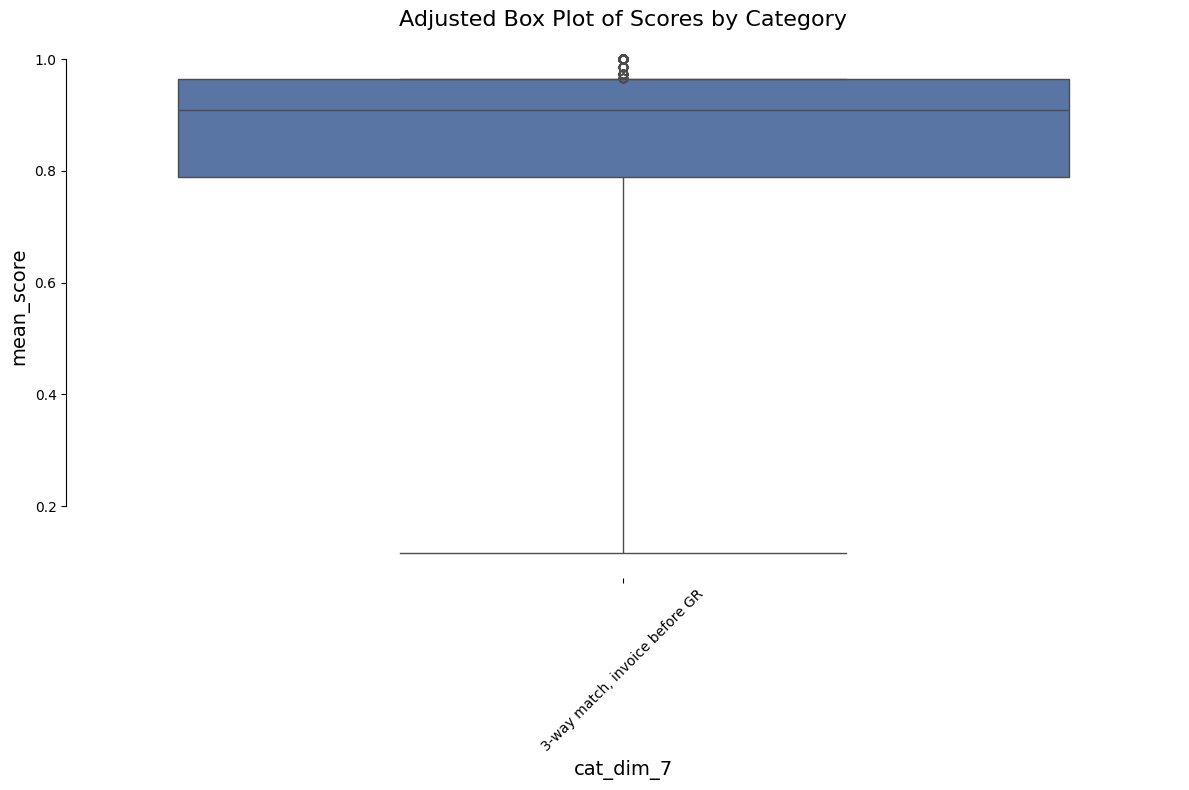

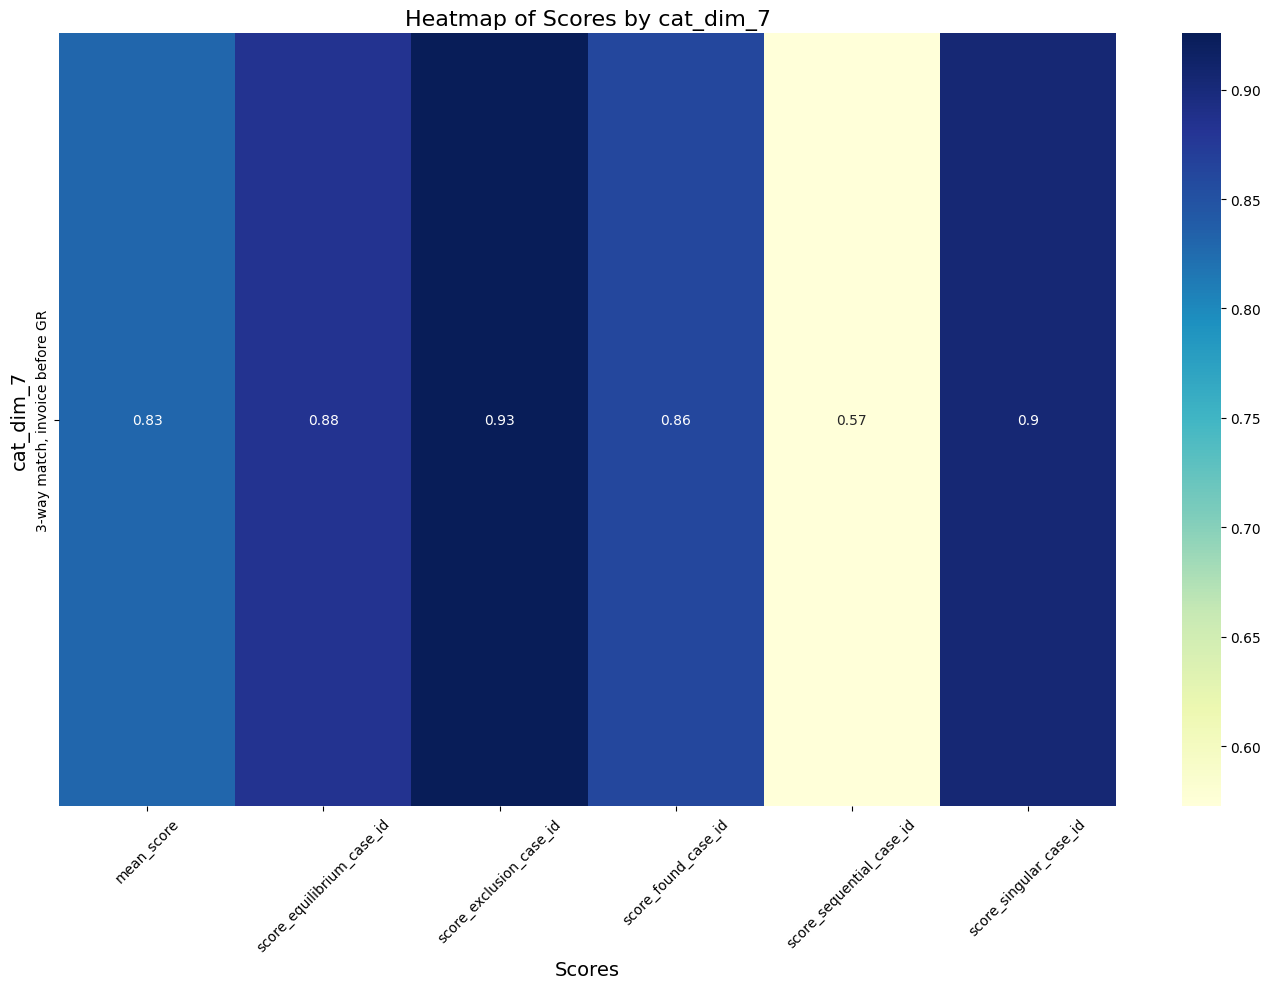

In [10]:
analyze_performance(visualize=True, category='cat_dim_7', score='mean_score', data_filtered=data_inv_gr)

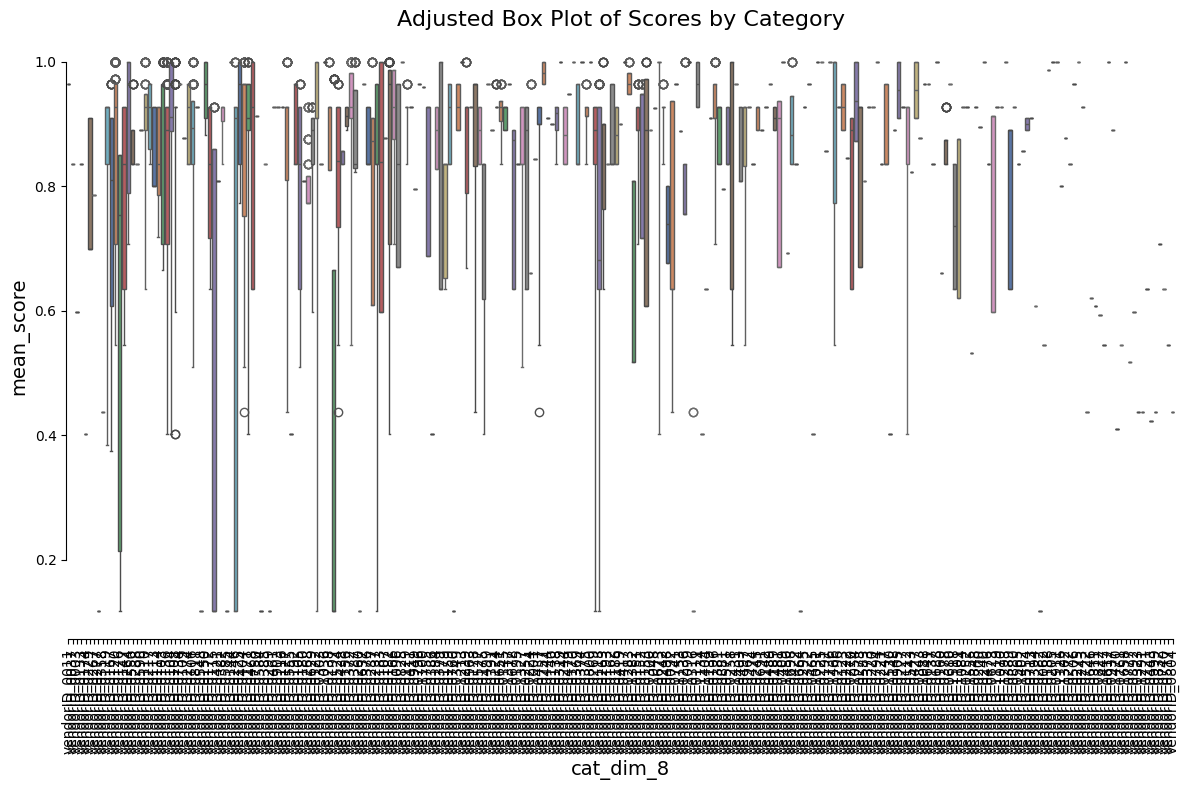

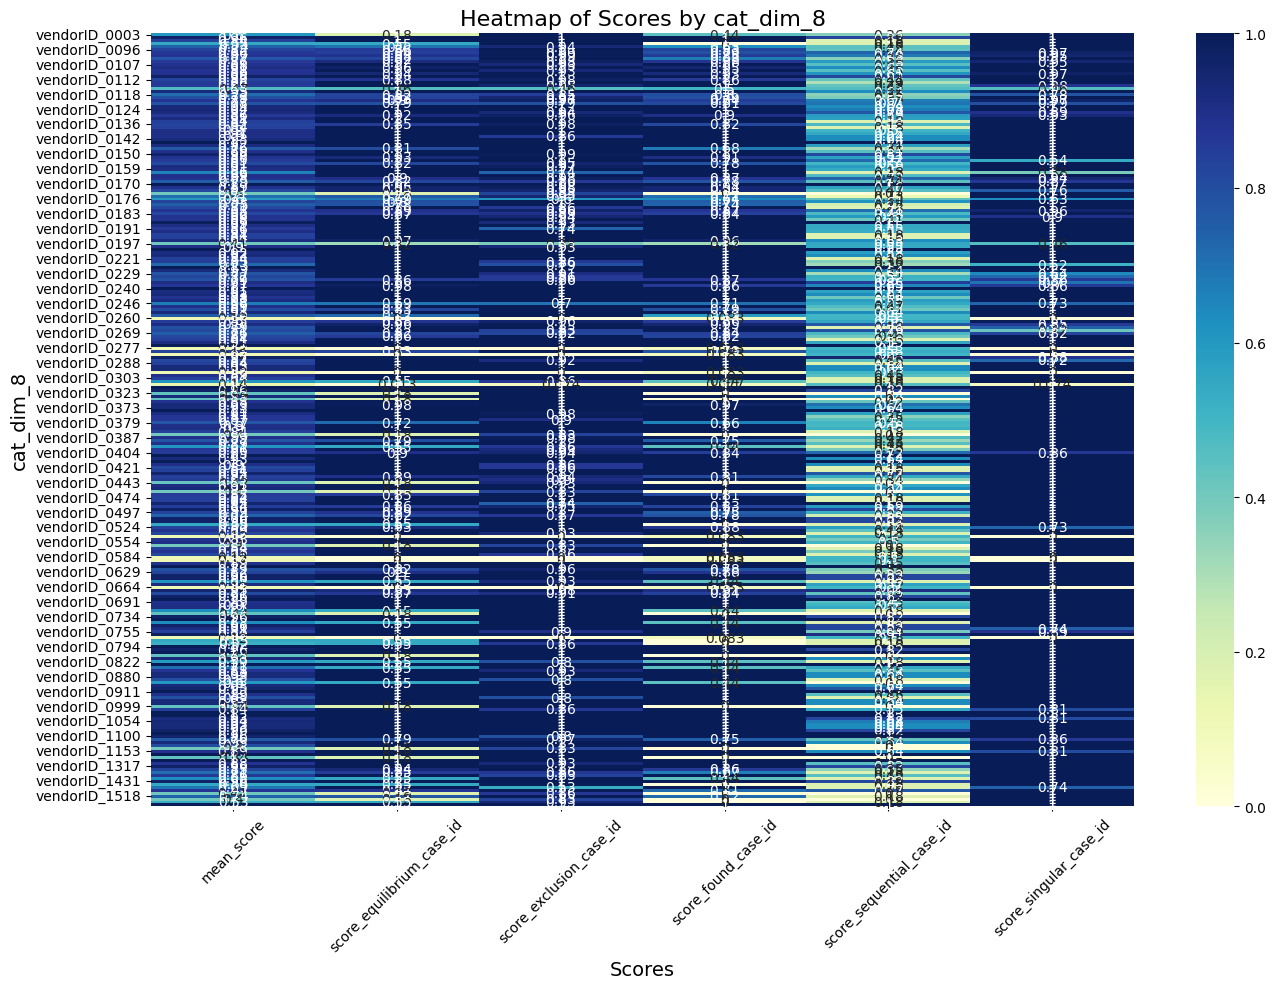

In [11]:
analyze_performance(visualize=True, category='cat_dim_8', score='mean_score', data_filtered=data_inv_gr)

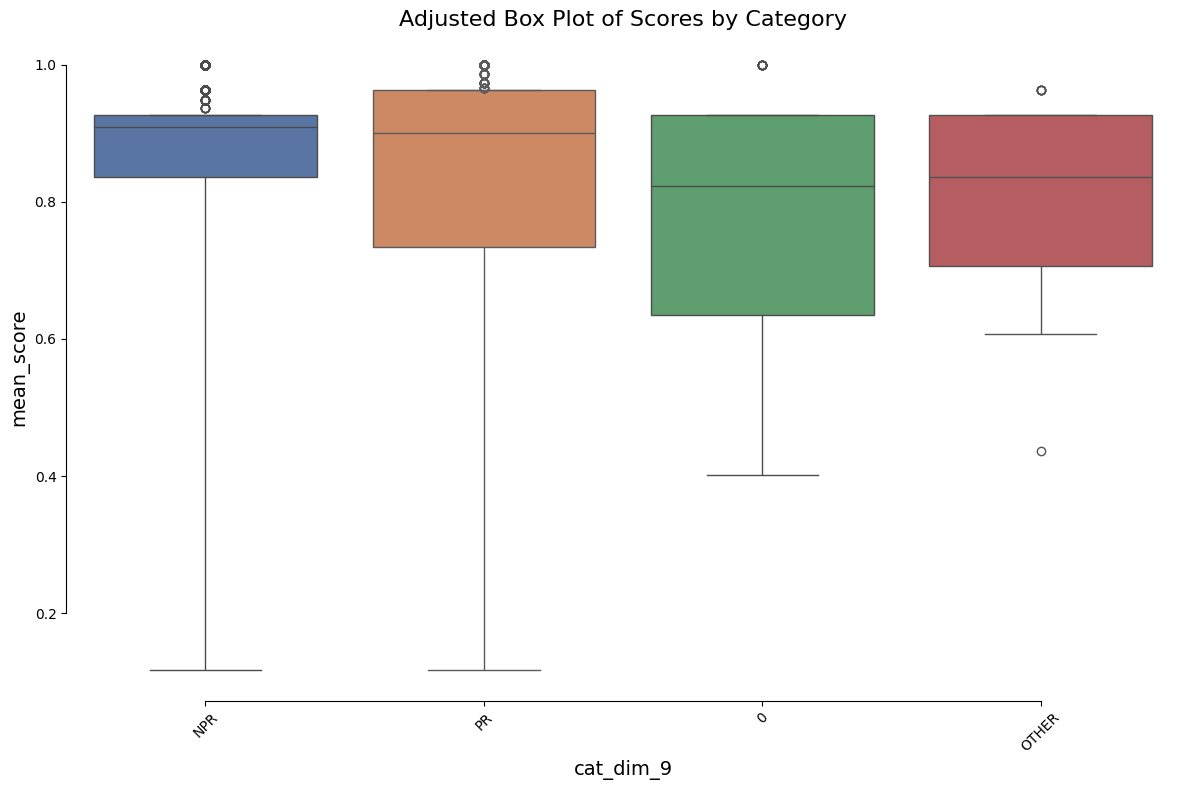

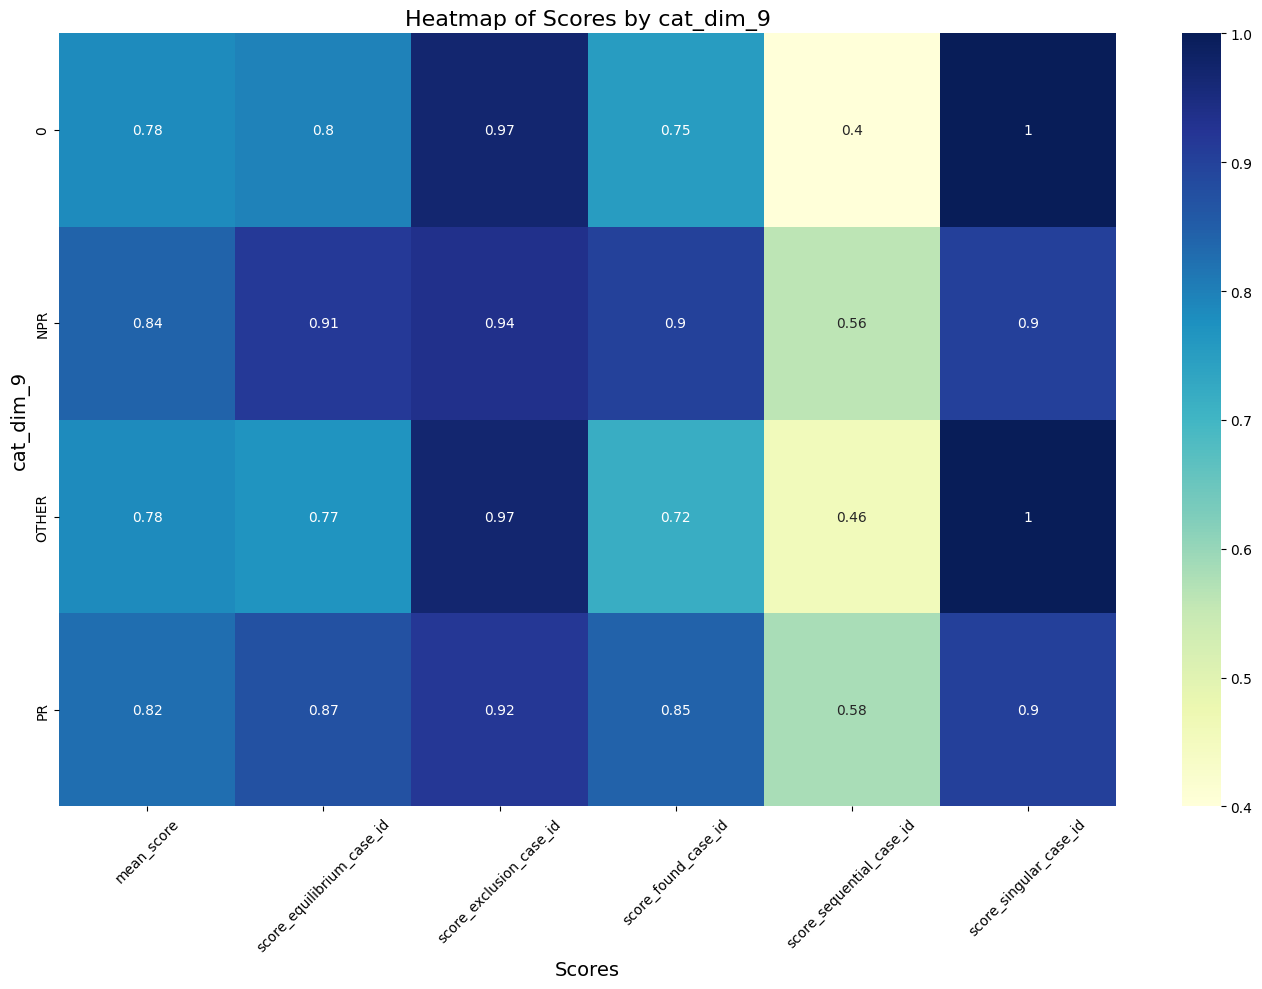

In [12]:
analyze_performance(visualize=True, category='cat_dim_9', score='mean_score', data_filtered=data_inv_gr)

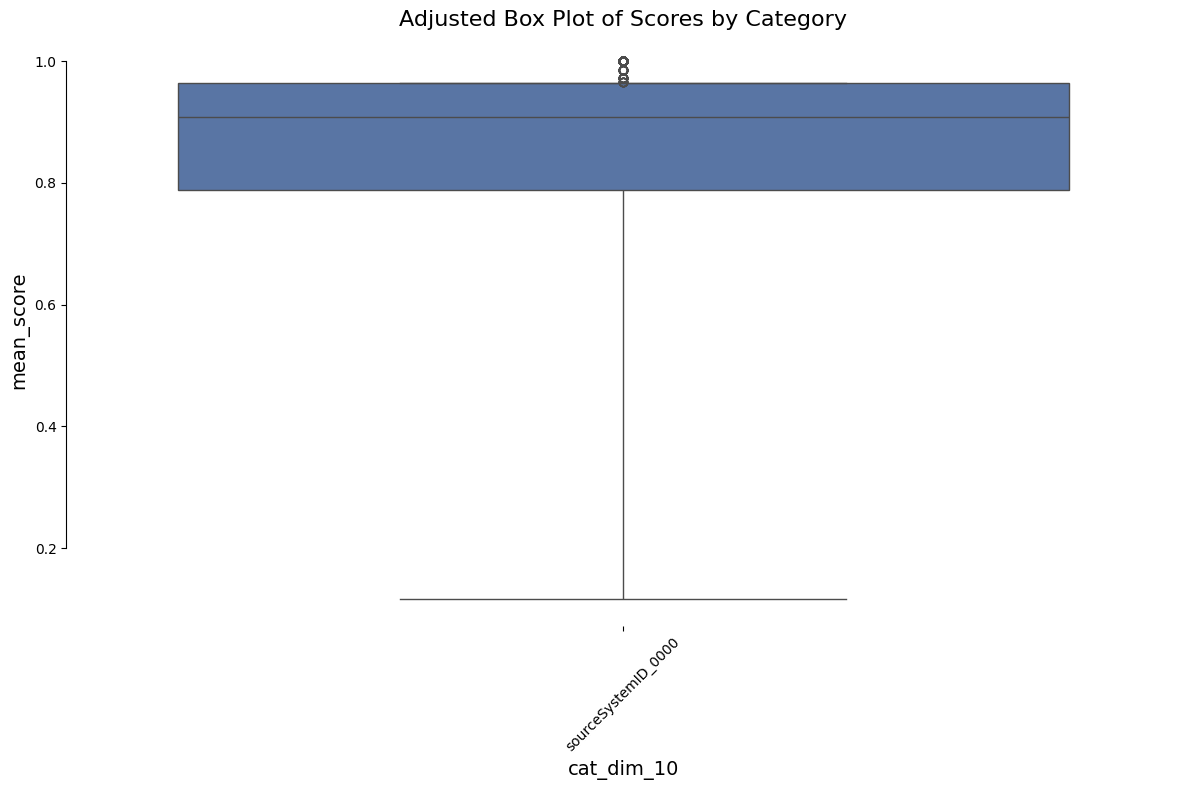

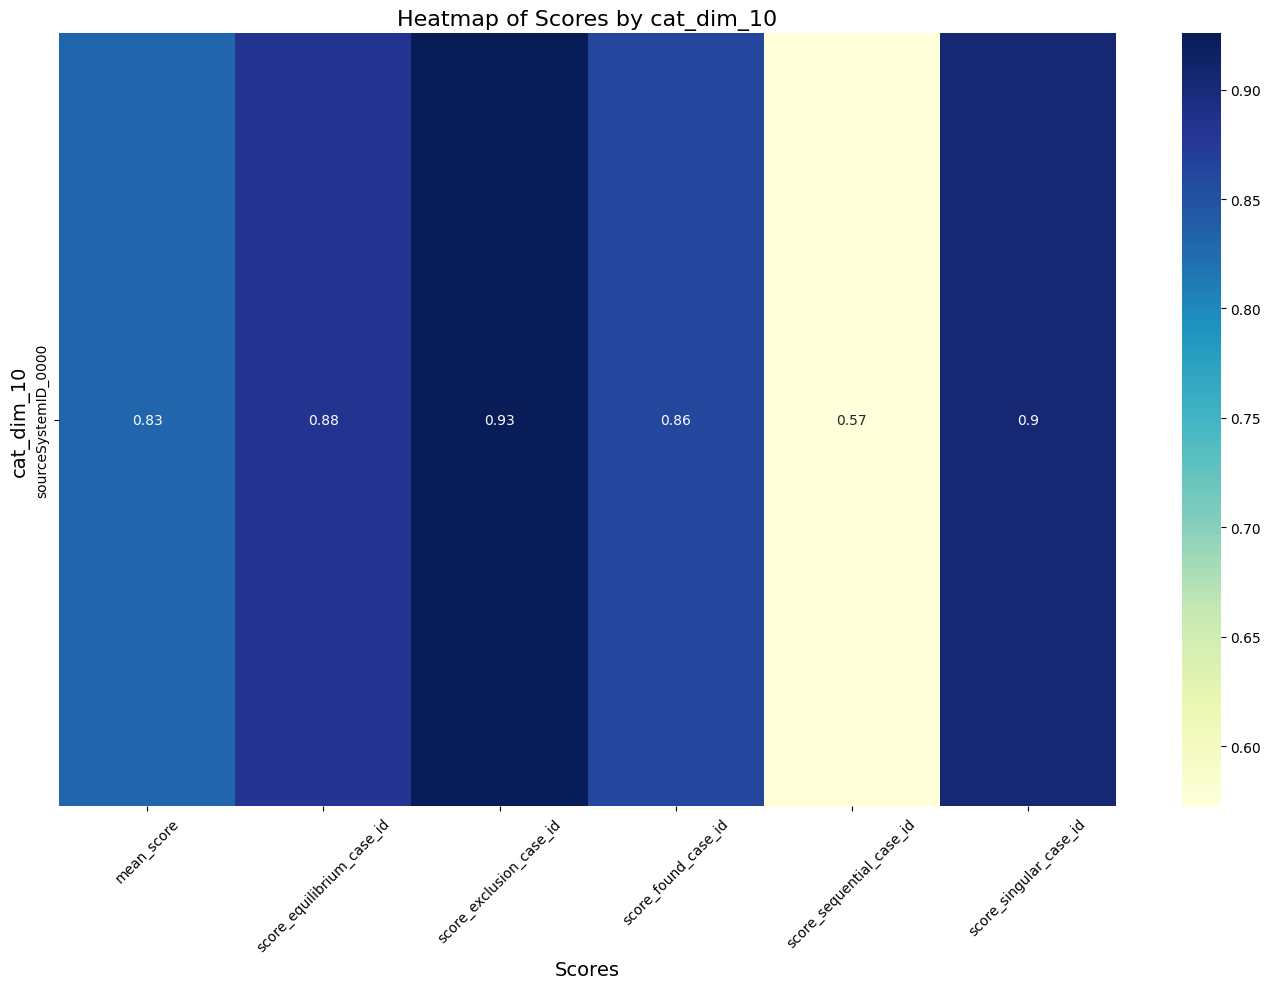

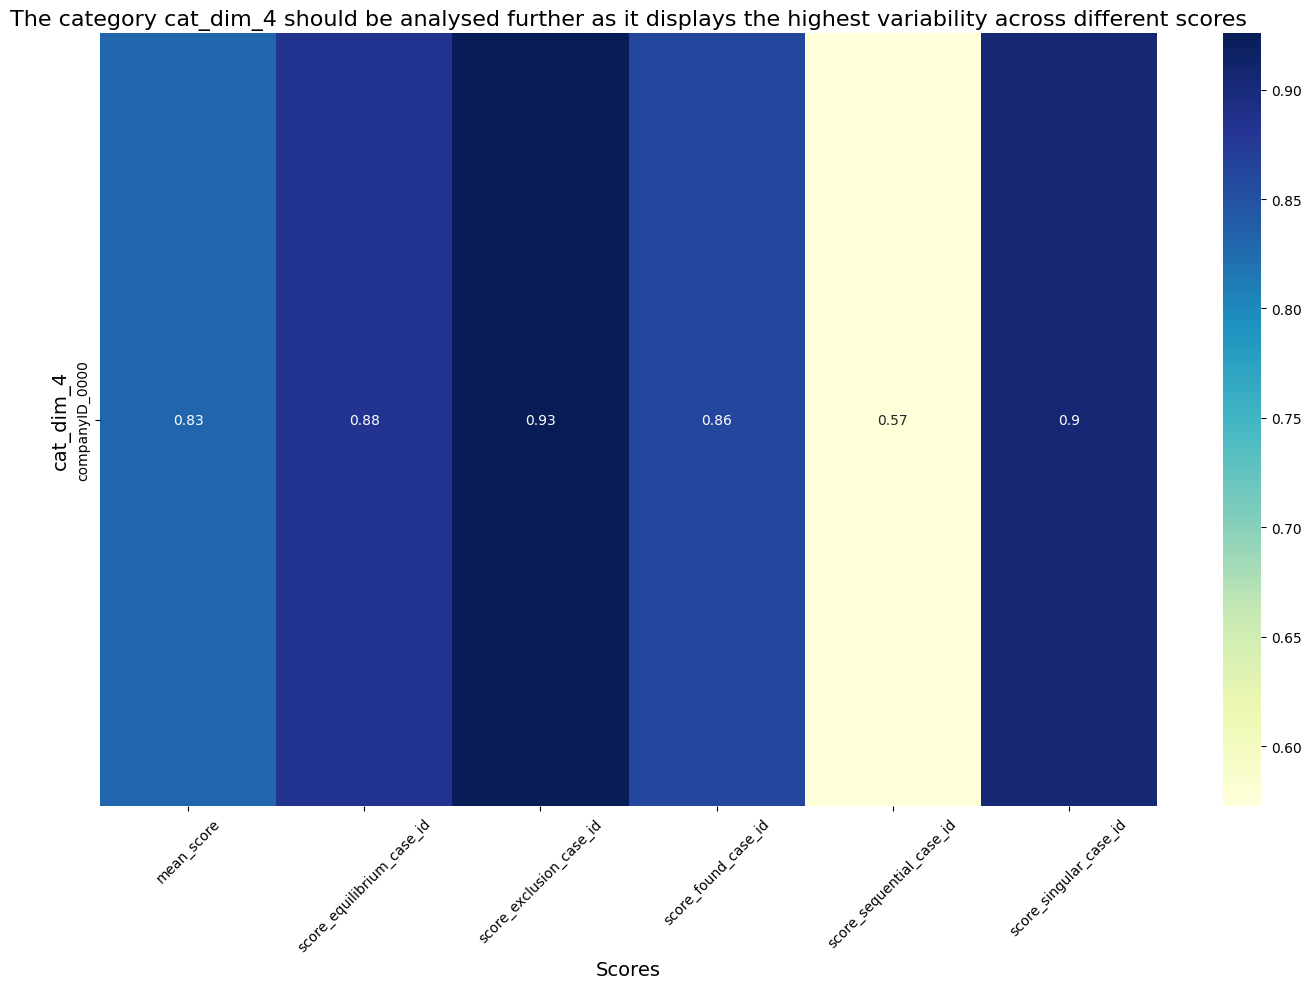

In [16]:
analyze_performance(visualize=True, category='cat_dim_10', score='mean_score', data_filtered=data_inv_gr)

## OPENAI Analysis

In [18]:
api_key = "YOUR API KEY"

In [27]:
category = 'cat_dim_2'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
The meaning of columns for heatmap - columns show score between 0 and 1. The higher the score the better the process performance.:
        'score_found_case_id' - score is given for presence of mandatory activities in the process, 
        'score_sequential_case_id' - score is given for correct order of activities in the process, 
        'score_equilibrium_case_id' - score is given for balanced distribution of activities in the process, 
        'score_singular_case_id' - score is given for absence of duplicate activities in the process, 
        'score_exclusion_case_id' - score is given for absence of manual, costly or otherwise not wanted activities in the process.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

The provided image is an adjusted box plot visualizing scores by different categories of a process. These scores reflect process-related features evaluated as part of the Business Process Intelligence Challenge (BPIC) 2019 dataset. Here are the insights based on the information present:

1. Data Distribution: Scores vary significantly across categories, with some categories showing a higher median score (close to 1.0) and others a lower median score.
2. Variability: There appears to be variability within categories, as indicated by the length of the box plots. Categories with longer boxes have a wider range of scores, suggesting less consistency in performance.
3. Outliers: Several categories have outlier points, which are data points significantly higher or lower than the rest. These should be examined to determine if they represent data errors, exceptional cases, or points of interest for improving the process.

Next Steps:
1. **Outlier Analysis**: Investigate the outliers for each c

In [30]:
category = 'cat_dim_2'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_heatmap.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
The meaning of columns - columns show score between 0 and 1. The higher the score the better the process performance.:
        'score_found_case_id' - score is given for presence of mandatory activities in the process, 
        'score_sequential_case_id' - score is given for correct order of activities in the process, 
        'score_equilibrium_case_id' - score is given for balanced distribution of activities in the process, 
        'score_singular_case_id' - score is given for absence of duplicate activities in the process, 
        'score_exclusion_case_id' - score is given for absence of manual, costly or otherwise not wanted activities in the process.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

The heatmap provided visualizes the performance scores across five process features for various categories (process relevant features). Based on the color scale, darker shades of blue represent higher scores (closer to 1) and indicate better performance, while lighter shades, such as yellows and light blues, represent lower scores (closer to 0).

Analyzing the image, we see:

1. Strong Performance:
   - Most categories score very well in 'score_equilibrium_case_id' and 'score_singular_case_id', suggesting that the balance of activities and the absence of duplicates are consistent strengths across the processes.
   - 'score_found_case_id' also has generally high scores, indicating the presence of mandatory activities is typically well adhered to.

2. Areas for Improvement:
   - 'score_exclusion_case_id' has noticeable variability, with some categories like Digital Marketing scoring zero, suggesting a significant presence of manual, costly, or not wanted activities.
   - 'score_sequentia

In [29]:
category = 'cat_dim_3'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
The meaning of columns - columns show score between 0 and 1. The higher the score the better the process performance.:
        'score_found_case_id' - score is given for presence of mandatory activities in the process, 
        'score_sequential_case_id' - score is given for correct order of activities in the process, 
        'score_equilibrium_case_id' - score is given for balanced distribution of activities in the process, 
        'score_singular_case_id' - score is given for absence of duplicate activities in the process, 
        'score_exclusion_case_id' - score is given for absence of manual, costly or otherwise not wanted activities in the process.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

The image shows an adjusted box plot comparing the mean scores of two different categories related to process performance. It is important to note that the label 'cat_dim_3' seems to be a placeholder and might represent a category that has been anonymized or labeled without context. To provide meaningful insights, the actual names of the categories would be necessary. Here, they are labeled as 'EC purchase order' and 'Standard PO'.

Based on the box plot:

1. 'EC purchase order' has a high mean score that is close to 1, with a narrow interquartile range that suggests low variance among the scores. This indicates that the process is performing well in this category, consistently meeting the process relevant features with a high level of quality.

2. 'Standard PO' also has a relatively high median score, but with a much wider interquartile range, which indicates higher variance and possibly some inconsistency in process performance. Furthermore, there are outliers indicated by the indivi

In [22]:
category = 'cat_dim_4'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

Based on the box plot provided, we can interpret the following:

1. The plot represents a single category (cat_dim_4) for the process performance scores.
2. The median score is high, close to the top of the box, indicating that at least half of the scores are clustered towards the higher end of the range.
3. The box itself is very small, which suggests that the interquartile range (IQR) is narrow, and therefore most of the scores are very similar, indicating consistency in the scores for this category.
4. There are several individual points above the main box, which represent outliers. These are scores that are exceptionally higher than the rest.

Actionable Insights:

1. Investigate the outliers to understand if they represent exceptional performance that can be replicated or if they are due to data recording errors.
2. Since the scores are generally high, review what processes or practices are contributing to this high performance and ensure they are maintained or further optimized.


In [10]:
category = 'cat_dim_5'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)


I've analyzed the box plot of scores by category provided in the image. Here are the insights based on the image:

1. Variability: Categories such as Latex & Monomers, Training End Products, and Pigments & Colorants show high variability in scores as indicated by the longer interquartile ranges (IQR) and the presence of outliers. This suggests that there might be inconsistencies or fluctuations in the performance or scoring mechanism for these categories which could be worth investigating.

2. Performance issues: The category CAPEX & SOCs has a notably lower median score than the others and the IQR is situated below the rest, suggesting overall lower performance or scoring. This is a key area for improvement.

3. High performers: Some categories such as Logistics, Specialty Resins, Commodity Resins, and Others have relatively high median scores and smaller IQRs, indicating consistent and high performance.

4. Outliers: Almost every category has outliers, but especially in the categorie

In [23]:
category = 'cat_dim_6'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

The provided box plot displays the distribution of scores for process relevant features categorized into three groups: Standard, Third-party, and Subcontracting.

Initial observations from the box plot are as follows:

1. **Standard**: Scores for the Standard category exhibit a wide interquartile range (IQR), suggesting considerable variability within this group. The median score is around 0.9, indicating a generally high performance level. However, there's an outlier on the lower end, which suggests at least one substantially underperforming instance in this category.

2. **Third-party**: The lack of any box or whiskers for the Third-party category indicates either missing data, or that all data points have the same value. If all data points are the same, this suggests no variation in Third-party scores. Additional data verification is required to provide accurate insights for this category.

3. **Subcontracting**: Similar to the Third-party category, the Subcontracting group also lac

In [24]:
category = 'cat_dim_7'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

The image displays an adjusted box plot of scores by a certain category labeled as "cat_dim_7". The plot suggests the distribution of scores for what appears to be a specific feature within a process, possibly denoted by "3-way match invoice before GR". Here are the insights from the box plot:

1. The median score is near the top of the box, indicating that the median value is on the higher end of the score range.
2. The interquartile range (IQR) is quite narrow, which implies that the middle 50% of scores are clustered closely around the median.
3. There is a significant number of outliers below the lower whisker, suggesting there are instances where the score is far below the typical range.
4. The scores seem to be skewed towards the lower end given the outliers and the median closer to the upper quartile.

Next steps:

1. Investigate the cause of the low-scoring outliers. Determine if these are due to data entry errors, process deviations, or other factors. Correct any data issues, 

In [25]:
category = 'cat_dim_8'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

In analyzing the box plot shown, we observe the performance of a process based on various categories. Here are some insights derived from the image:

1. Variance: There is noticeable variance in performance scores across different categories. This suggests that some features are better at meeting the process criteria than others.

2. Outliers: Several categories display outliers, which are data points that are significantly higher or lower than the rest of the data for that category. This could indicate exceptional cases or possible errors in data collection that may warrant further investigation.

3. Median Score: Most categories appear to have median scores above 0.7, indicating that overall performance is relatively high. However, there are a few categories with lower medians that may require attention.

4. Spread: The interquartile range (IQR), which is the distance between the 25th and 75th percentiles, varies between categories. Categories with larger IQRs might imply less consis

In [26]:
category = 'cat_dim_9'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
Make it consise and actionable.
"""

response = analyze_image(api_key=api_key,image_path=image_path,prompt=prompt)
print(response)

The box plot represents the distribution of scores across four distinct categories labeled as NPR, PR, O, and OTHER. Here is the analysis:

1. **Central Tendency and Spread:**
   - All categories have median scores above 0.8, indicating relatively high performance across the board.
   - The NPR category appears to have a slightly lower median score compared to the others.

2. **Consistency:**
   - The PR category demonstrates the most consistency, with the smallest interquartile range (IQR) indicating that scores are more clustered around the median.
   - The NPR category appears less consistent with a wider IQR, suggesting more variability in the scores for this category.

3. **Outliers:**
   - All categories exhibit outliers on the high score end, with scores exceeding the upper whiskers of the box plots.
   - The NPR category contains the most outliers, while the PR has the least, which aligns with the observed variability in consistency.

4. **Potential Issues:**
   - The OTHER cat

## Chat GPT Feedback (Chat GPT 4 Turbo called on 12.05.2024)

## Detailed Analysis Recommendations Based on Adjusted Box Plot of Scores by Category

### 1. Categories with High Variability
- **Focus Areas**: "Additives", "Logistics", and "Specialty Resins" show high variability in scores, as indicated by the length of their box plots and the presence of many outliers.
- **Action**: Investigate the factors causing this variability to understand inconsistencies in performance or measurement within these categories.

### 2. Low Score Categories
- **Focus Areas**: "Marketing" and "Enterprise Services" appear to have significantly lower median scores compared to other categories.
- **Action**: Dive deeper into these categories to determine the causes of these lower scores and identify potential areas for improvement.

### 3. Outlier Analysis
- **Focus Areas**: Categories such as "Additives", "Logistics", and "Pigments & Colorants" display a significant number of outliers above the upper whisker.
- **Action**: Analyzing these outliers could provide insights into exceptional cases or errors in data collection or processing.

### 4. Performance Trends and Patterns
- **Action**: Compare these categories against other dimensions (like time, geographical location, or specific business units) to reveal trends or patterns in performance. Analyzing temporal trends could show whether the performance is improving or deteriorating over time.

### 5. Cross-Category Analysis
- **Action**: Examine the relationships between categories to yield insights. Factors leading to high performance in "Commodity Resins" and "Energy" might be leveraged to improve performance in lower-scoring categories.

### 6. Detailed Statistical Analysis
- **Action**: Employ statistical tests to compare the means and variances of these categories or conduct regression analysis to understand the impact of various factors on the scores.

### 7. Qualitative Feedback
- **Action**: Integrate qualitative data, such as feedback from stakeholders in underperforming categories like "Marketing" and "Enterprise Services," to offer context to the numerical data, helping to pinpoint specific issues or opportunities for improvement.

---
By focusing on these areas, we can develop a more nuanced understanding of the factors influencing performance across different segments of the business, thereby informing targeted strategies for enhancement.


## Analyze Marketing data

In [ ]:
data_marketing = data[data.cat_dim_5== 'Marketing']
data_marketing.head(2)

eventID  cat_dim_5       cat_dim_4          cat_dim_3  \
0  536870912000  Marketing  companyID_0000  EC Purchase order   
1  536870912001  Marketing  companyID_0000  EC Purchase order   

           cat_dim_2  case_Purchasing_Document case_Purch._Doc._Category_name  \
0  Digital Marketing                2000000100                 Purchase order   
1  Digital Marketing                2000000100                 Purchase order   

       cat_dim_8 cat_dim_6                      cat_dim_7  ...  \
0  vendorID_0053   Service  3-way match, invoice after GR  ...   
1  vendorID_0053   Service  3-way match, invoice after GR  ...   

                  timestamp case:concept:name            concept:name  \
0 2017-01-31 23:59:00+00:00  2000000100_00001  Vendor creates invoice   
1 2017-05-25 23:59:00+00:00  2000000100_00001  Vendor creates invoice   

             time:timestamp  score_found_case_id score_sequential_case_id  \
0 2017-01-31 23:59:00+00:00             0.001112                      0.0   
1 2017-05-25 23:59:00+00:00             0.001112                      0.0   

   score_equilibrium_case_id score_singular_case_id score_exclusion_case_id  \
0                   0.000548                    0.0                0.000894   
1                   0.000548                    0.0                0.000894   

  mean_score  
0   0.000511  
1   0.000511  

[2 rows x 36 columns]

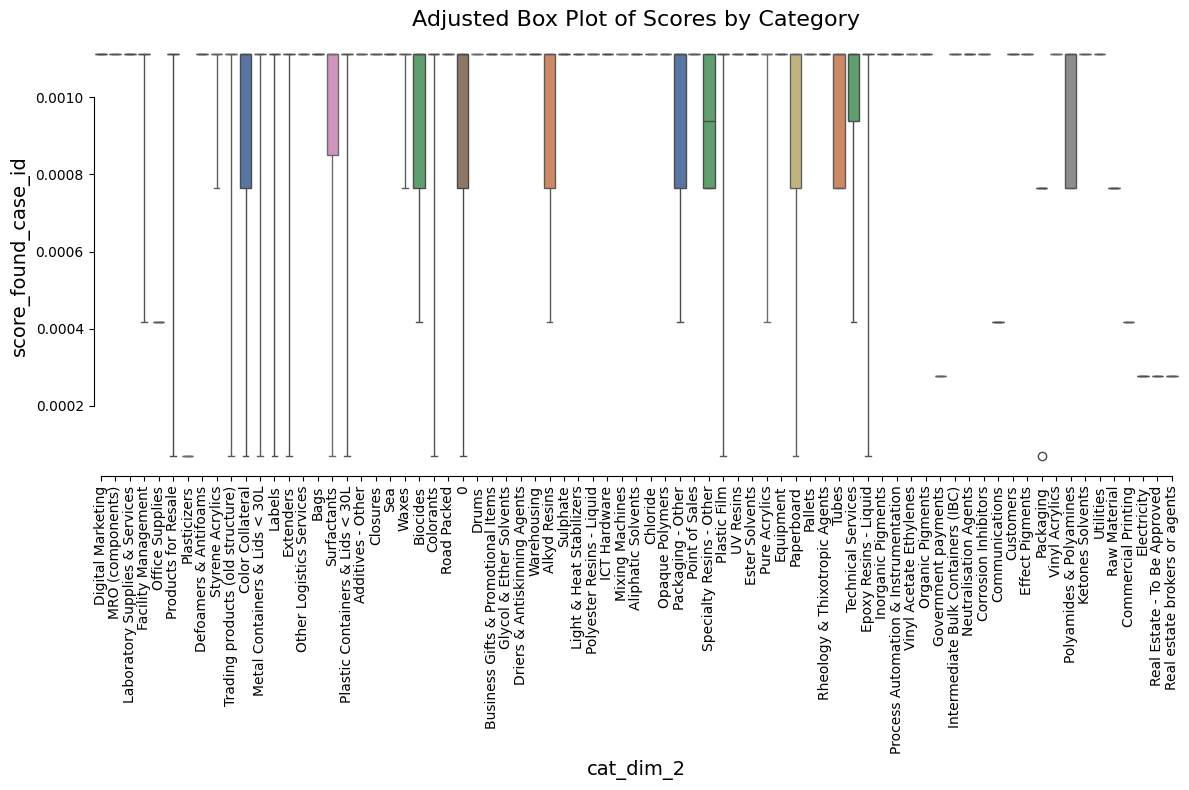

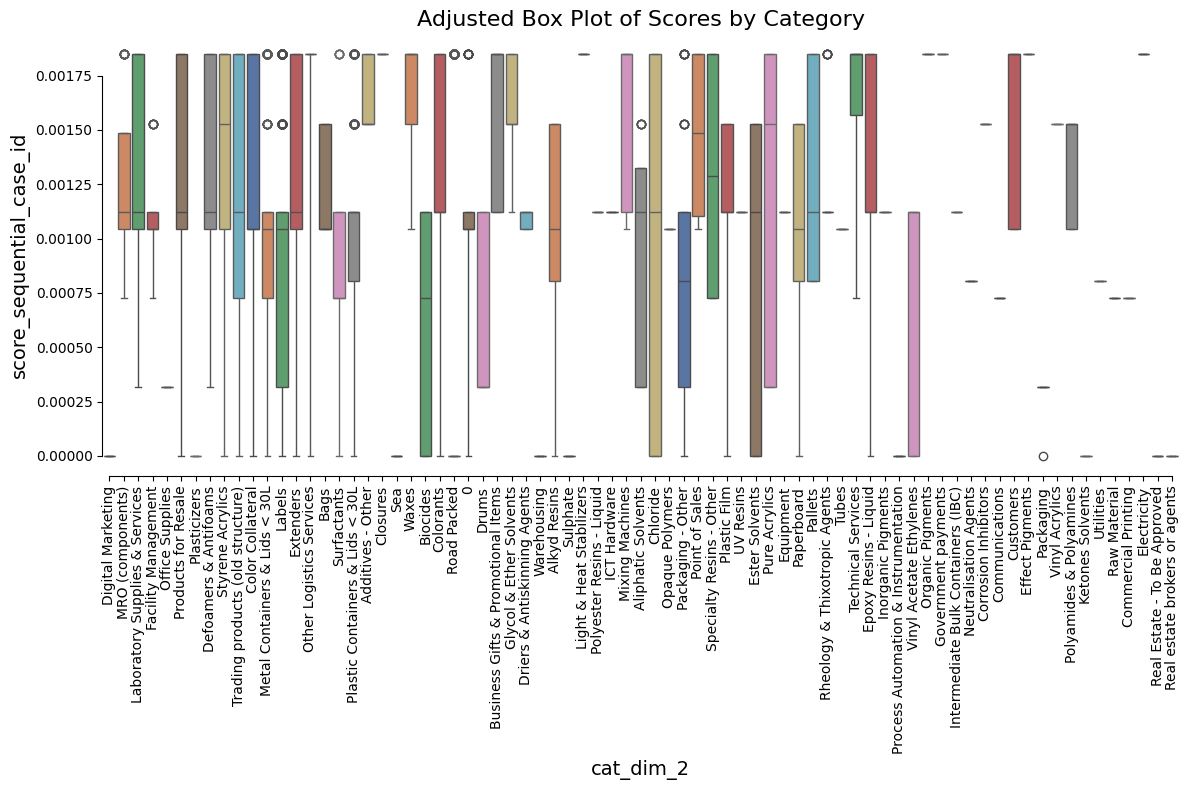

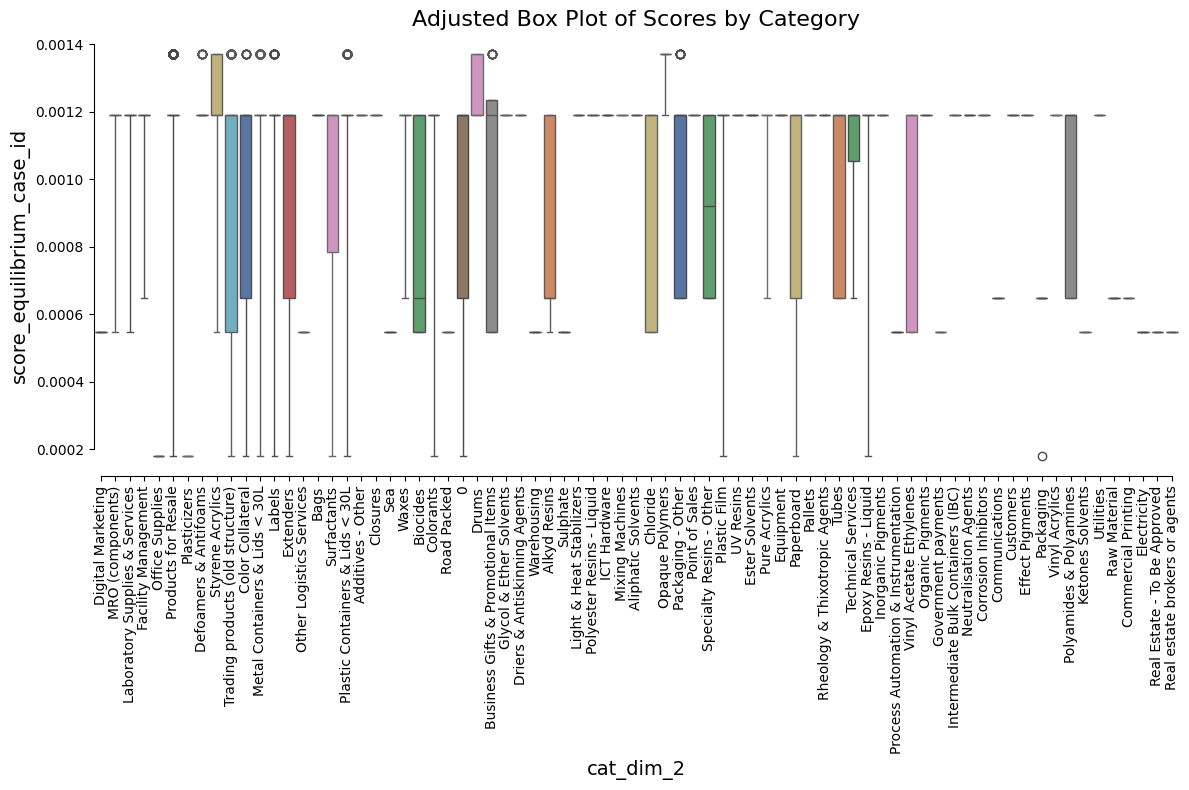

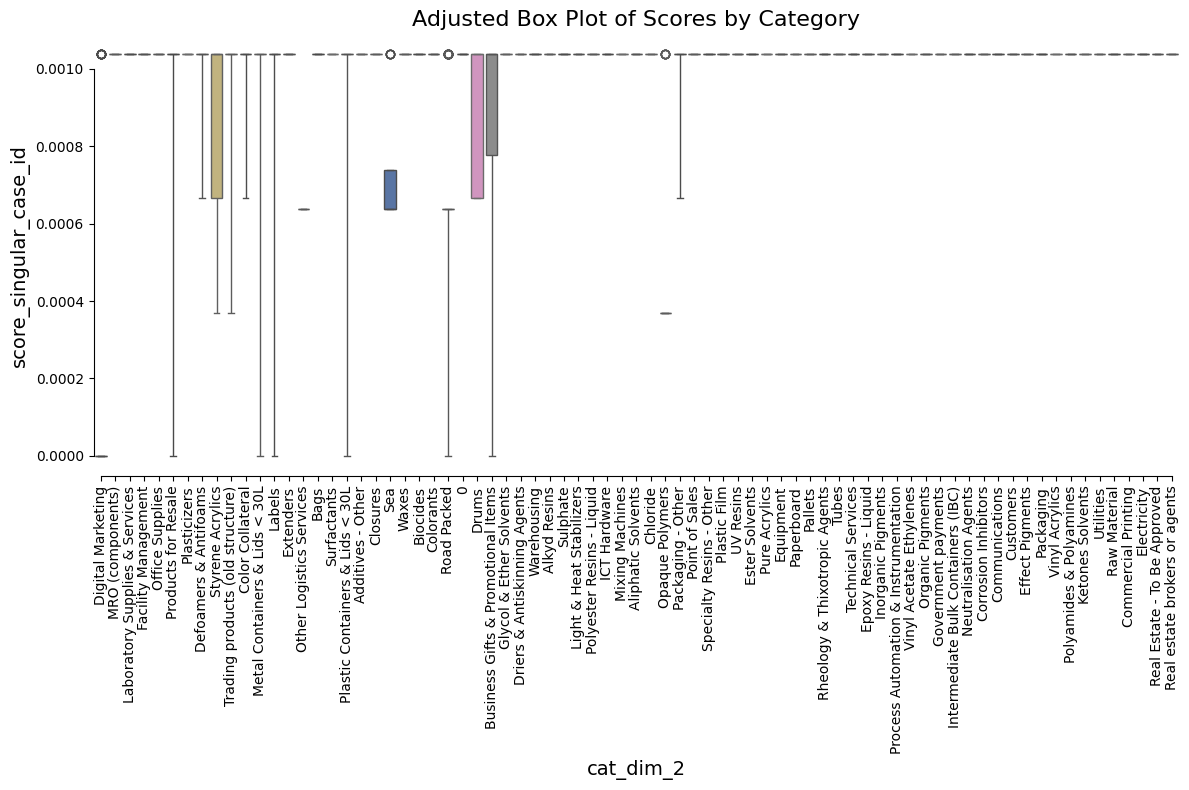

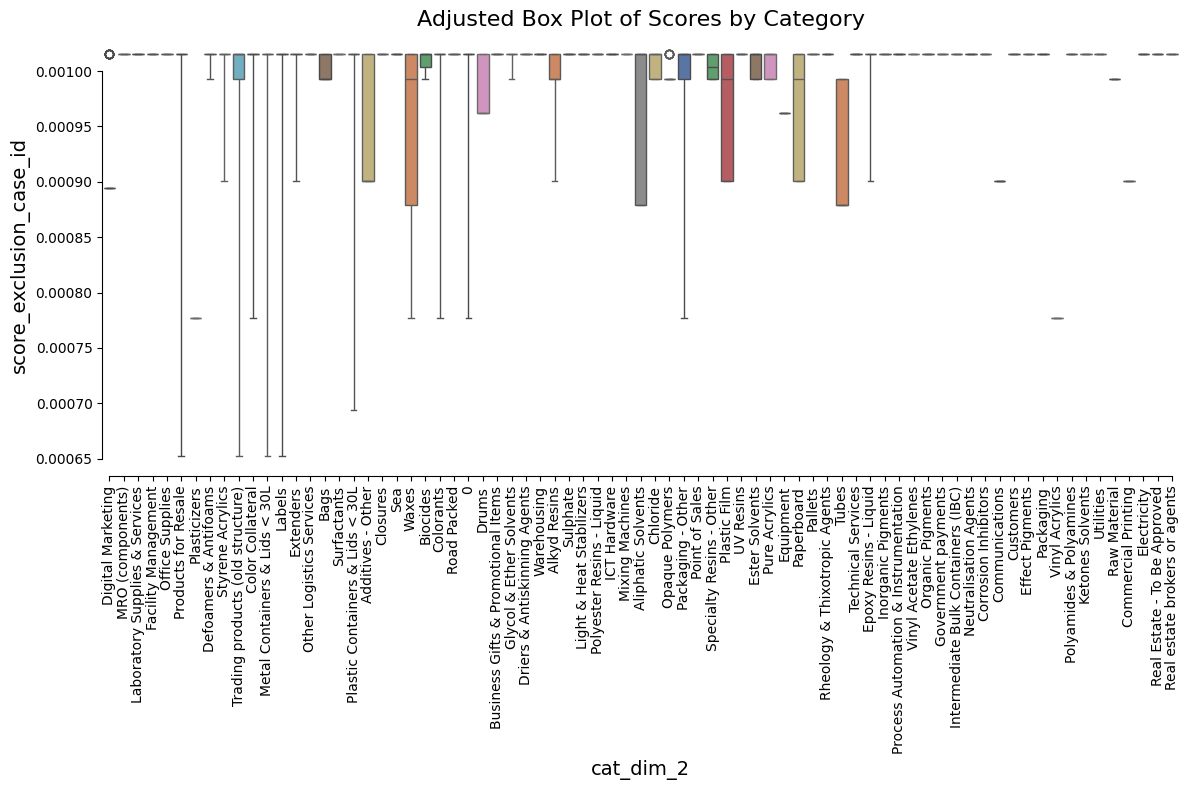

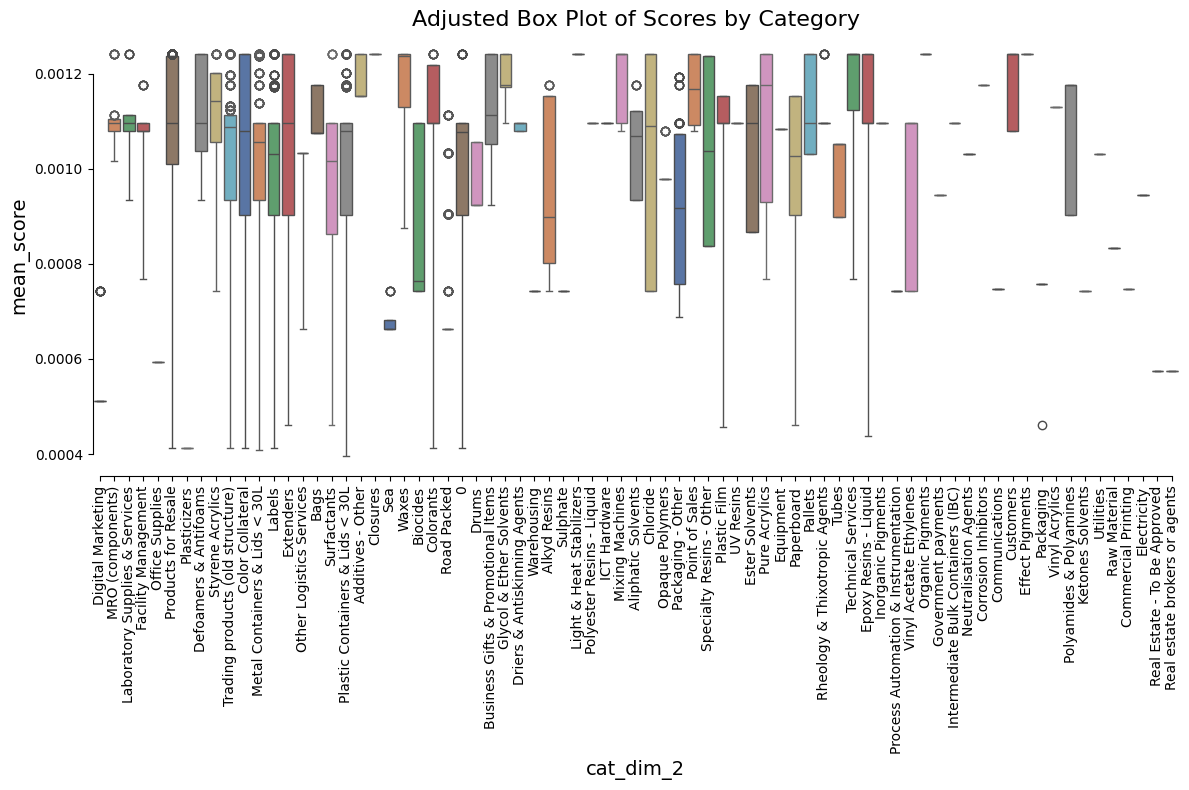

In [ ]:
score_columns = [c for c in data.columns if 'score' in c]
for column in score_columns:
   analyze_performance(visualize=True, category='cat_dim_2', score=column, method='adjusted')

# Marketing Analysis

From provided analysis especially sequential scoring seems to be the feature with the most impact on the target variable.
## Detailed Analysis of Sequential Scoring for Marketing Category in BPIC_2019 Dataset

### Observations from the Box Plot

- **Wide Range of Variability**: Several categories display a wide variability in scores, indicated by long boxes and whiskers. This suggests significant variability in the sequential processing times and adherence to the expected sequences.

- **Presence of Outliers**: There are numerous outliers across different categories, which might indicate exceptional cases or anomalies in process execution. These outliers could be due to unusual delays, advancements in the process flow, or perhaps errors in data recording.

- **Densely Packed Categories**: Some categories have densely packed scores with shorter interquartile ranges, indicating more consistent processing relative to others.

### Analysis Plan

1. **Identify Key Outliers**
   - **Objective**: Determine the cause of outliers in categories with high variability.
   - **Actions**: 
     - Drill down into individual cases that are outliers.
     - Understand whether they are due to process inefficiencies, data entry errors, or exceptional but valid scenarios.

2. **Category Performance Review**
   - **Objective**: Compare categories with higher median scores against those with lower scores to identify best practices or inefficiencies.
   - **Actions**: 
     - Analyze the steps involved in categories with higher performance.
     - Replicate successful strategies across other categories.

3. **Correlation Analysis**
   - **Objective**: Investigate if there’s a correlation between the sequence timings and other variables in the dataset such as volume of transactions, time of the year, or specific vendors involved.
   - **Actions**: Use statistical tools to analyze correlations and potentially build predictive models to understand impacts on the sequential scores.

4. **Process Optimization**
   - **Objective**: Enhance process efficiency where sequential scores are low.
   - **Actions**: 
     - Based on findings from outlier and performance reviews, suggest process adjustments or training where needed.

5. **Automated Alert System**
   - **Objective**: Early identification of deviations from the expected sequential process.
   - **Actions**: Develop or propose an automated monitoring system that alerts process managers when sequences deviate from established norms significantly.

6. **Longitudinal Study**
   - **Objective**: Understand trends over time.
   - **Actions**: 
     - If data across multiple years is available, analyze trends to see if there is improvement or deterioration in sequential scoring over time, which can guide long-term strategy adjustments.

### Immediate Actionable Insights

- **Prioritize Investigation of Extreme Outliers**: Immediate review of cases falling far outside the normal range to quickly address any ongoing issues or to capture insights from positive deviations.

- **Standardization Efforts**: For categories with high variability, consider standardizing the processes further to reduce the variability in how sequences are handled.

- **Training and Development**: Focus on training for categories where sequences often fail to follow the expected order, especially if these missteps can lead to financial losses or operational inefficiencies.

This structured approach provides a clear pathway to dive deeper into the dataset, using insights gained from the initial box plot analysis to drive improvements and ensure more robust and efficient process management within the organization.


## Further analysis

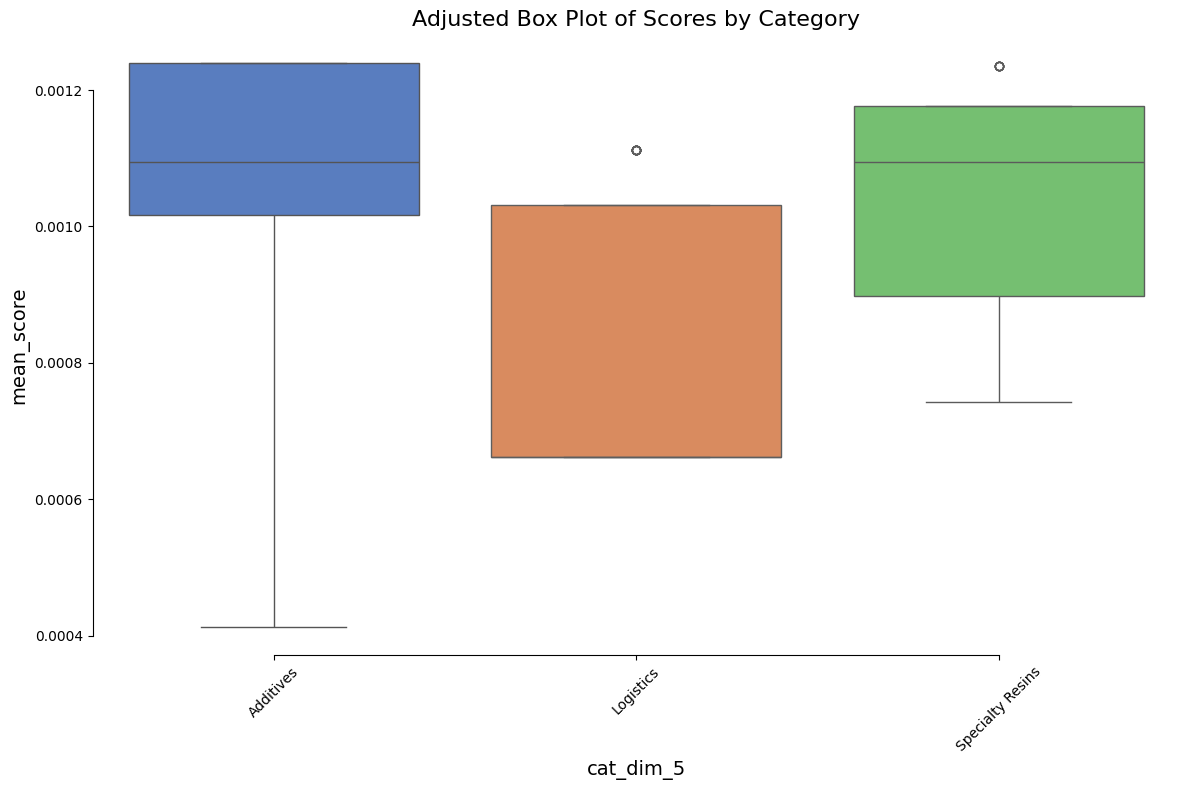

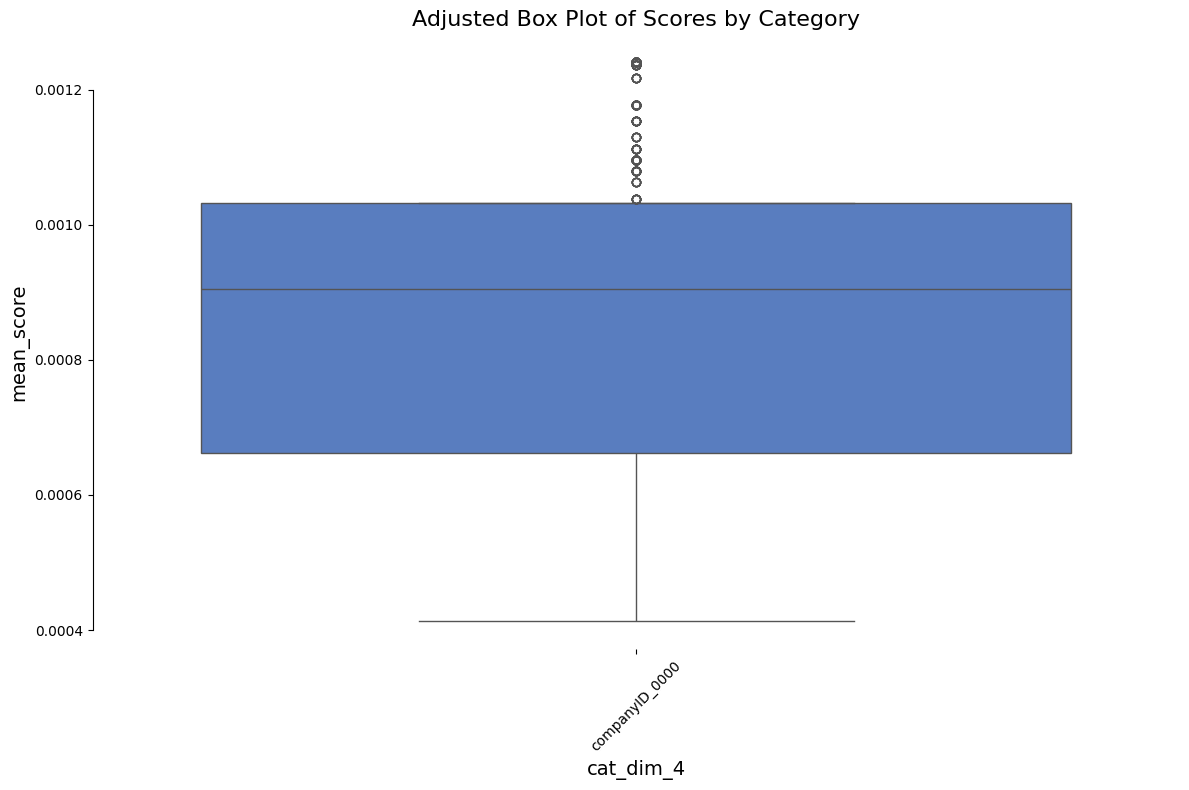

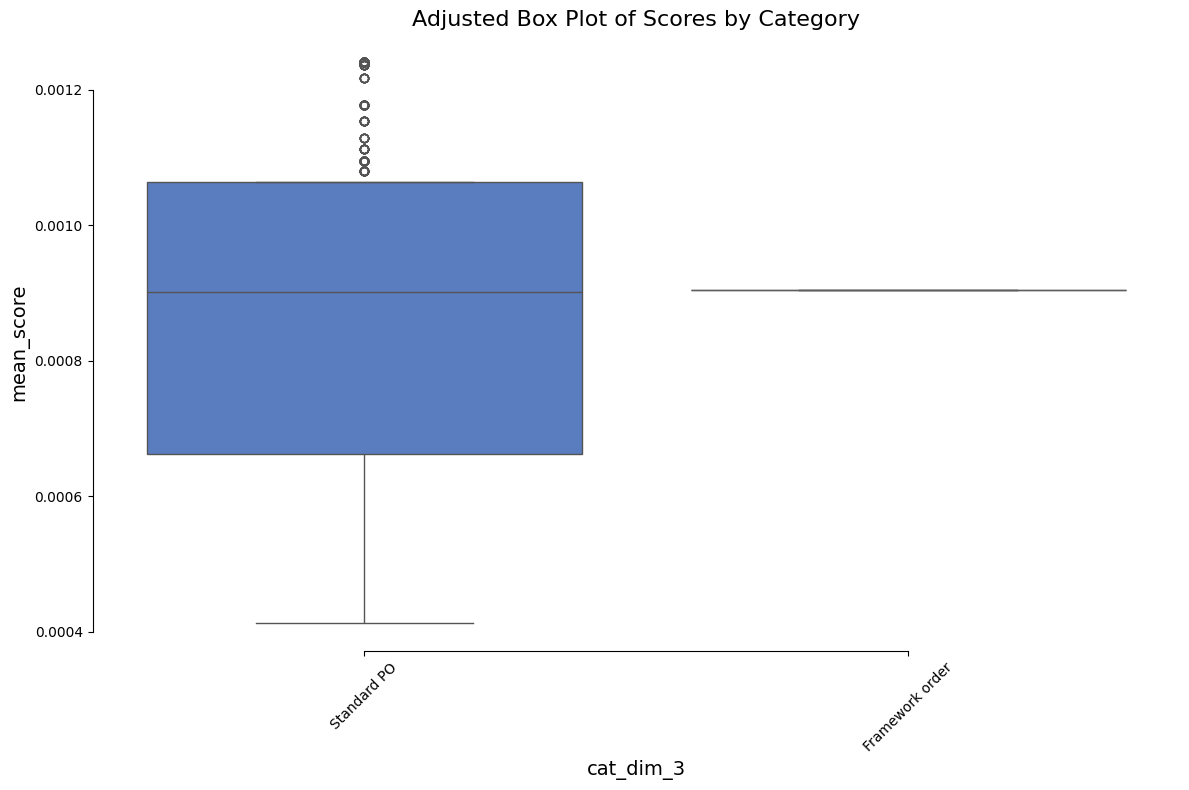

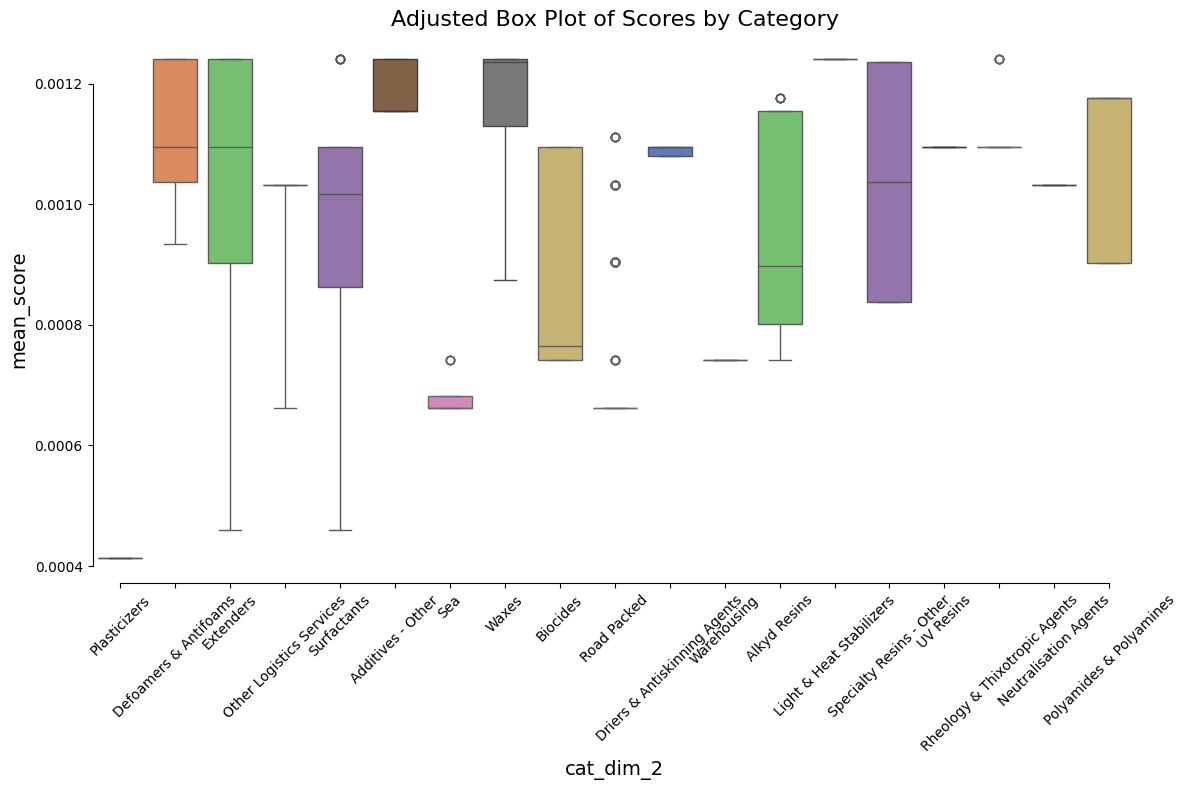

Error: y must be squeezable to a 1-d array for category cat_dim_8


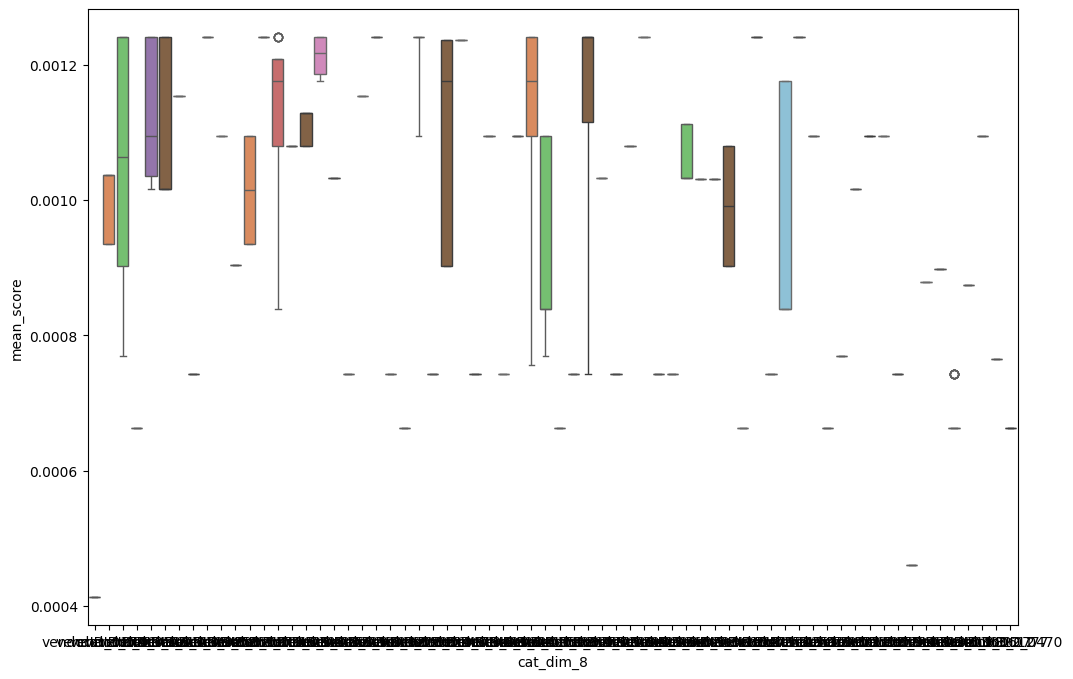

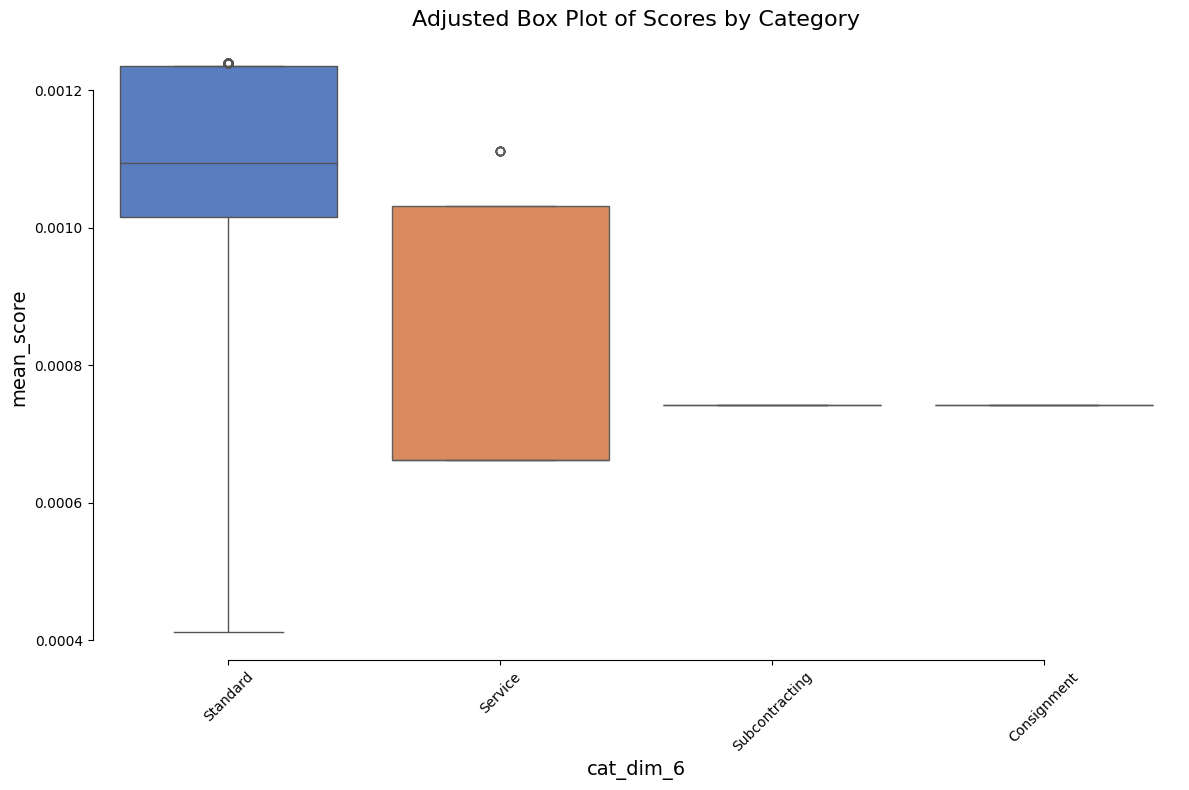

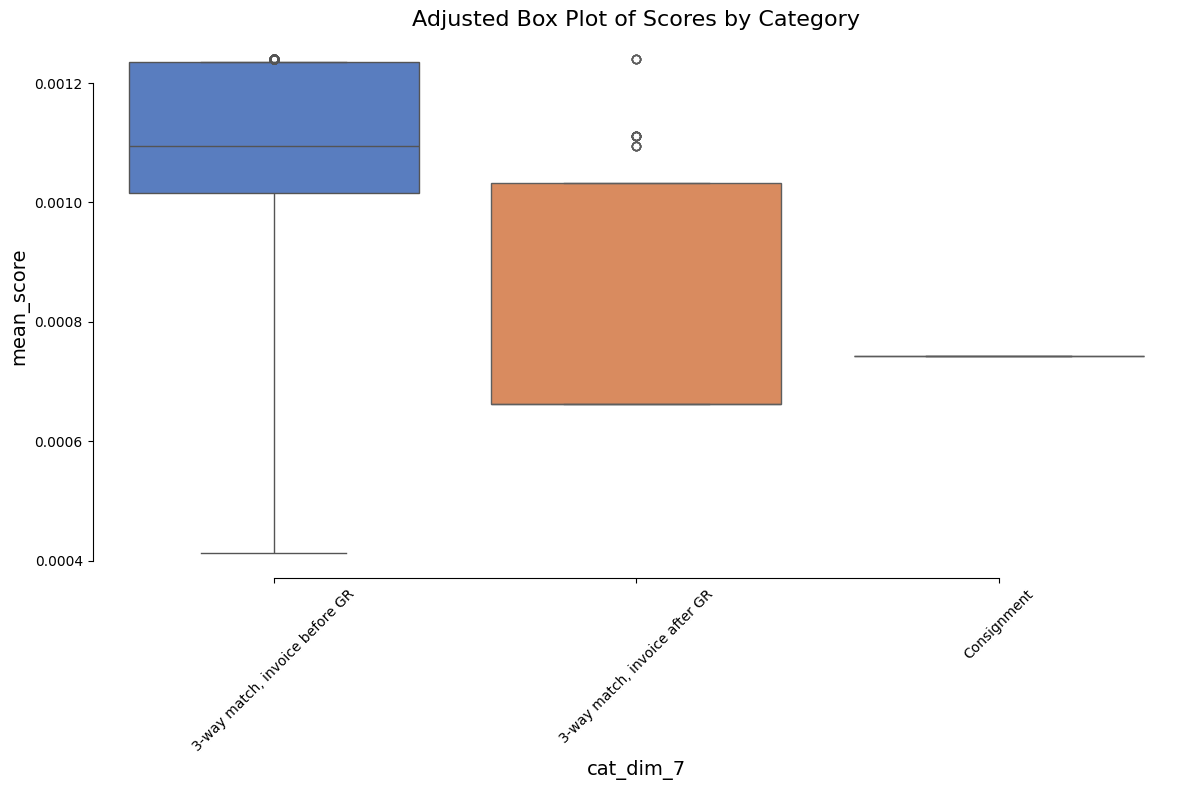

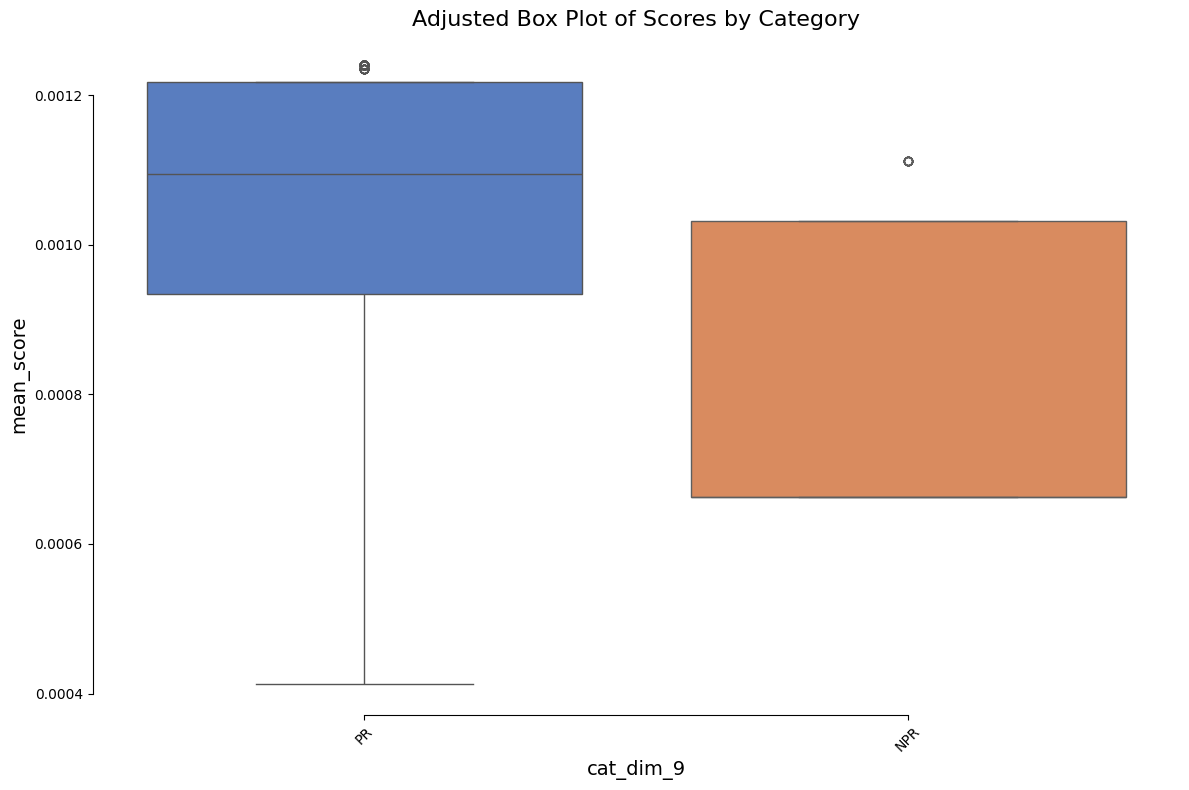

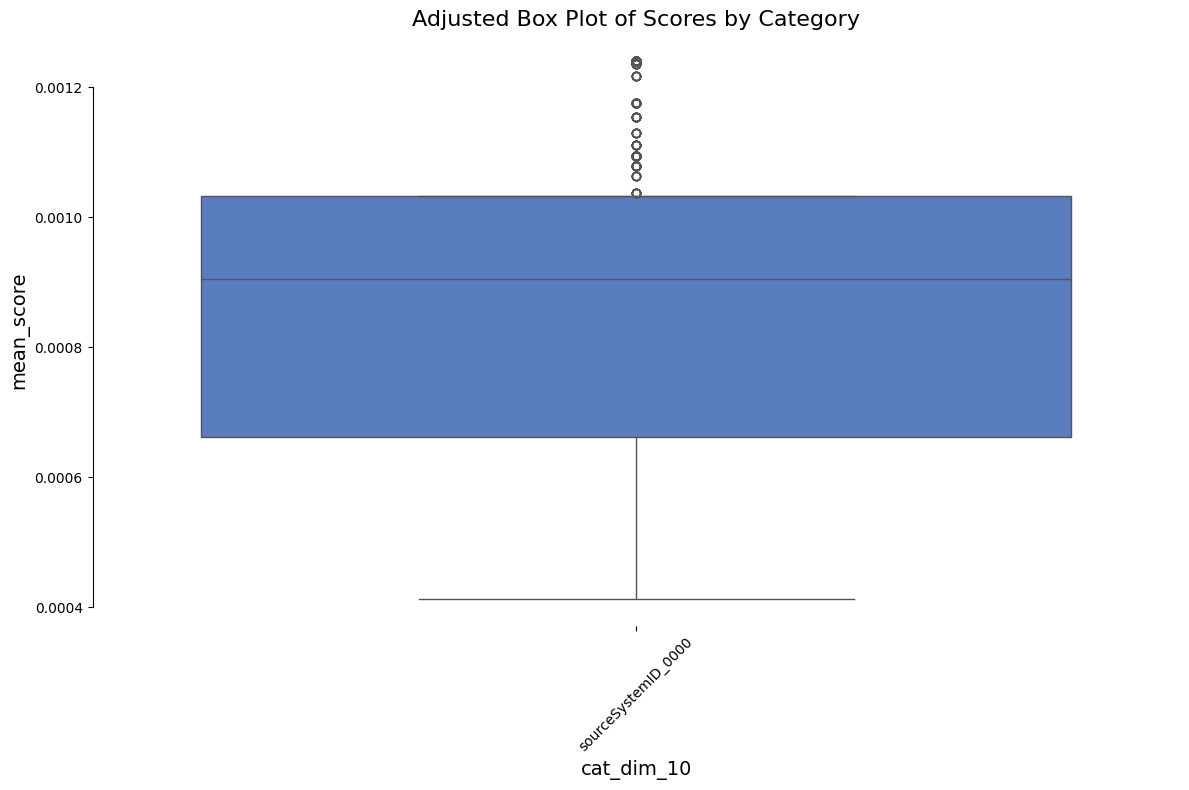

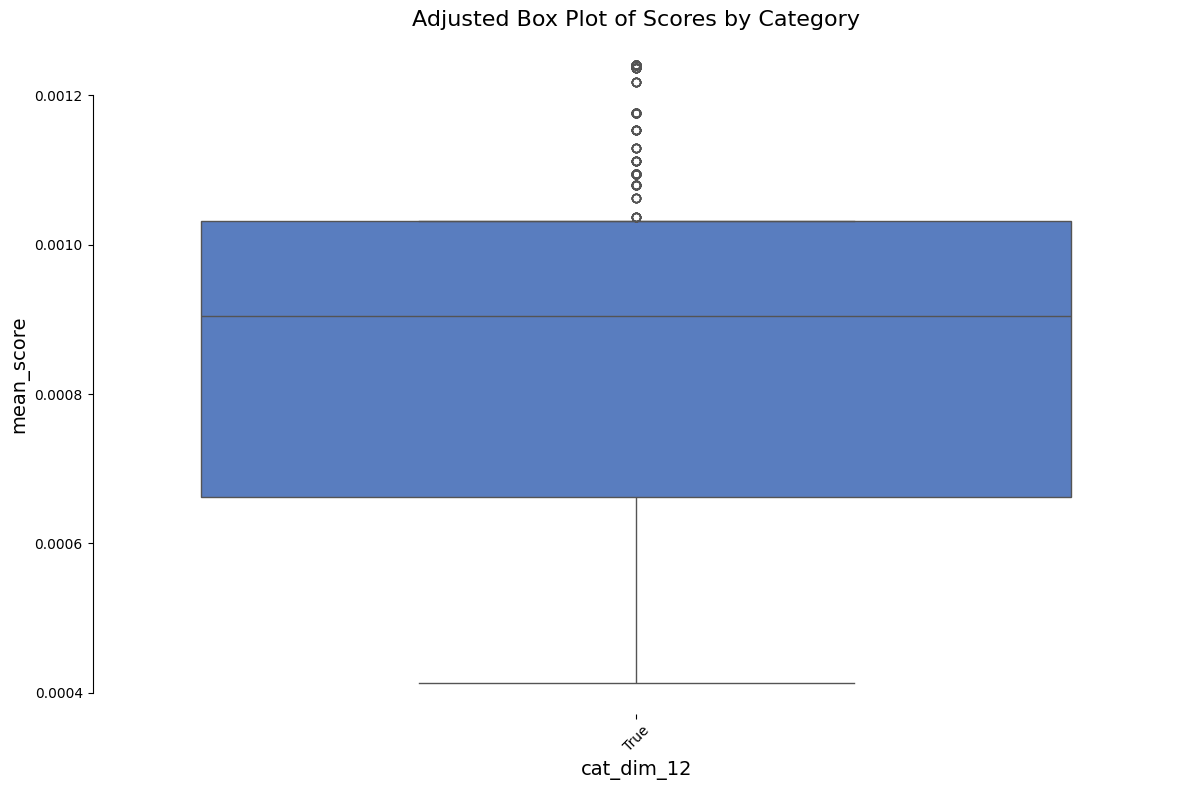

Error: y must be squeezable to a 1-d array for category cat_dim_resource


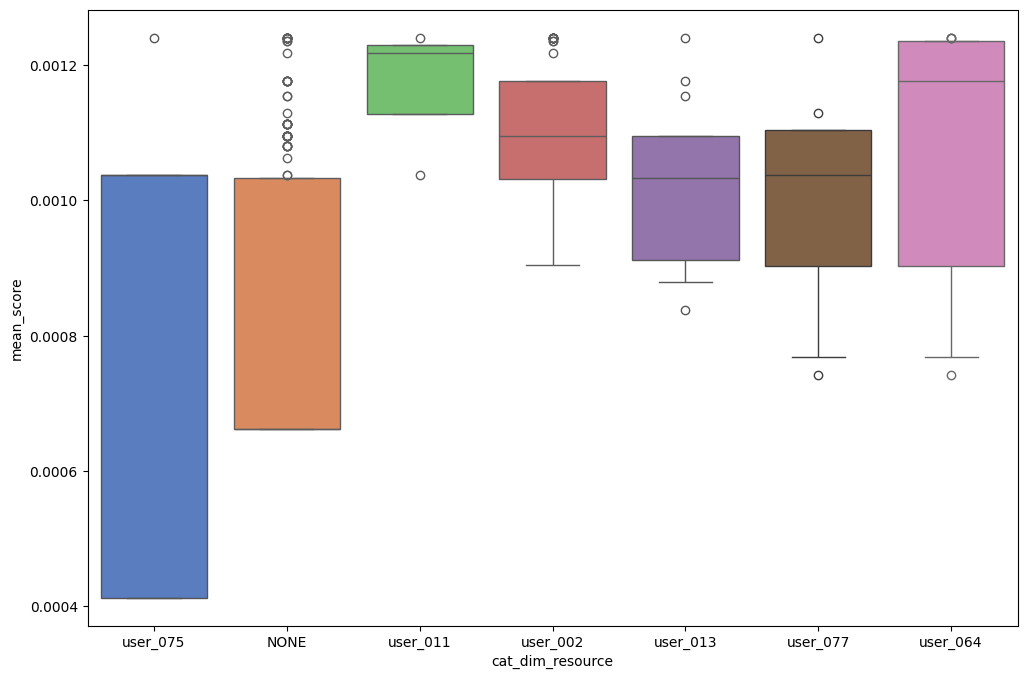

In [ ]:
import pandas as pd

def select_high_variability_categories(data):
    """
    Selects categories with high variability for further analysis.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data with a column named 'cat_dim_5' for categories.

    Returns:
    - pd.DataFrame: Filtered DataFrame containing only the selected high variability categories.
    """
    # Define the categories with high variability
    high_variability_categories = ['Additives', 'Logistics', 'Specialty Resins']

    # Filter the data for these categories
    filtered_data = data[data['cat_dim_5'].isin(high_variability_categories)]
    
    return filtered_data

data_high_variability = select_high_variability_categories(data)
cat_high_variability = [col for col in data_high_variability.columns if col.startswith('cat_dim')]


for category_hv in cat_high_variability:
    try:
        analyze_performance(visualize=True, category=category_hv, score='mean_score', method='adjusted', data_filtered=data_high_variability)
    except ValueError as e:
        print(f"Error: {e} for category {category_hv}")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def select_high_variability_categories(data):
    """
    Selects categories with high variability for further analysis.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data with a column named 'cat_dim_5' for categories.

    Returns:
    - pd.DataFrame: Filtered DataFrame containing only the selected high variability categories.
    """
    # Define the categories with high variability
    high_variability_categories = ['Additives', 'Logistics', 'Specialty Resins']

    # Filter the data for these categories
    filtered_data = data[data['cat_dim_5'].isin(high_variability_categories)]
    
    return filtered_data

def plot_category_scores(data, category_column, score_column='mean_score'):
    """
    Plots boxplot for the selected category and score column with unique colors for each category using a calmer color palette.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data.
    - category_column (str): The category column to plot.
    - score_column (str): The score column to use for plotting.
    """
    plt.figure(figsize=(12, 8))
    # Creating a color palette that can dynamically adjust to the number of categories
    unique_categories = data[category_column].nunique()
    # Using 'muted' palette for calmer colors
    palette = sns.color_palette("muted", unique_categories)
    
    # Plotting with the color palette
    sns.boxplot(x=category_column, y=score_column, data=data, palette=palette)
    plt.title(f'Box Plot of {score_column} by {category_column}')
    plt.xticks(rotation=90)
    plt.xlabel(category_column)
    plt.ylabel(score_column)
    sns.despine(trim=True)
    plt.show()

def interactive_plot(data):
    """
    Creates an interactive plot with a dropdown to select the category column.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data.
    """
    category_columns = [col for col in data.columns if col.startswith('cat_dim')]
    
    dropdown = widgets.Dropdown(
        options=category_columns,
        value=category_columns[0],
        description='Category:',
        disabled=False,
    )
    
    def update_plot(category_column):
        plot_category_scores(data, category_column=category_column)

    interactive_widget = widgets.interactive(update_plot, category_column=dropdown)
    display(interactive_widget)


data_high_variability = select_high_variability_categories(data)  # Assuming 'data' is defined and contains relevant columns
interactive_plot(data_high_variability)


interactive(children=(Dropdown(description='Category:', options=('cat_dim_5', 'cat_dim_4', 'cat_dim_3', 'cat_d…